# NBA DATA GATHERING FOR 2019-20 SEASON


### Import libraries

In [1]:
import numpy as np
import os
import pandas as pd
import requests
import json
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

[Comprehensive list of NBA Stats and descriptions](https://www.nba.com/stats/help/glossary)

### Import initial data

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None)
os.chdir('/Users/jarrodmautz/NBA_Proj')

In [3]:
df = pd.read_excel(r"NBA 2019-20 Season Data/Player Statistics/NBA_Player_Advanced-Others_2019-2020_Season.xlsx")
df.shape

(487, 31)

In [4]:
df.head(10)

,Player,Advanced ASTpercent,Advanced OREBpercent,Advanced DREBpercent,Advanced REBpercent,Advanced TSpercent,Advanced USGpercent,Advanced PACE,Advanced PIE,postupdefense Poss,postupdefense PPP,Postupoffense Poss,Postupoffense PPP,putbacksoffense Poss,putbacksoffense PPP,Scoring percentPTS2PT_MR,Scoring percentPTS3PT,Scoring percentPTSFBPs,Scoring percentPTSFT,Scoring percentPTSOffTO,Scoring percentPTSPITP,Scoring 2FGMpercentAST,Scoring 3FGMpercentAST,Scoring FGMpercentAST,spotupoffense Poss,spotupoffense PPP,touches Time_OfPoss,touches Avg_Sec_PerTouch,touches Avg_Drib_PerTouch,TransitionOffensive Poss,TransitionOffensive PPP
0,Langston Galloway,8.8,1.8,6.5,4.1,58.3,14.5,100.78,7.4,0.2,1.14,0.0,0.00,0.2,0.50,7.3,58.8,16.1,11.4,14.2,22.5,73.3,100.0,88.4,3.3,1.20,0.9,1.94,1.25,1.6,1.32
1,Anfernee Simons,10.2,1.6,8.4,5.0,51.7,18.1,103.10,6.1,0.4,0.82,0.0,0.00,0.0,0.00,15.5,38.2,11.8,12.7,13.5,33.5,35.0,68.8,46.5,2.4,0.89,2.1,3.80,3.25,1.4,0.93
2,Bobby Portis,11.9,5.9,18.1,11.8,51.3,20.2,101.75,10.3,0.7,0.89,2.1,0.81,1.1,0.90,13.1,31.8,6.0,10.8,14.6,44.3,52.3,98.2,64.7,2.7,0.99,1.1,1.68,0.69,1.0,1.29
3,Coby White,15.5,1.7,13.0,6.9,47.7,22.3,102.28,7.6,0.2,1.17,0.0,0.00,0.0,0.00,6.9,48.0,20.1,11.1,20.3,34.0,28.0,78.6,50.2,3.4,0.94,2.7,3.82,3.21,2.5,1.06
4,Dorian Finney-Smith,6.8,6.7,11.2,9.0,59.4,12.8,99.37,7.1,1.0,0.84,0.0,0.00,1.0,1.04,1.2,51.6,15.9,11.6,16.1,35.6,56.8,96.6,76.1,3.8,1.03,1.1,1.85,0.85,1.6,1.24
5,Doug McDermott,7.4,1.9,9.6,5.9,61.8,18.3,101.43,8.9,0.3,1.29,0.0,0.00,0.3,1.31,5.2,55.6,12.4,6.3,13.1,32.9,85.3,100.0,92.6,1.9,1.24,0.5,1.31,0.49,1.0,1.38
6,Ivica Zubac,8.7,13.2,22.9,18.1,63.7,16.5,101.91,13.5,0.8,0.68,0.5,0.80,1.9,1.08,6.8,0.0,12.4,19.9,15.6,73.3,72.9,0.0,72.9,0.2,1.09,0.9,1.47,0.40,0.8,1.55
7,Jalen Brunson,26.4,2.1,10.2,6.2,55.5,19.9,100.79,10.8,0.5,1.32,0.0,0.00,0.0,0.00,15.7,28.0,12.8,13.3,12.6,43.0,23.0,81.4,37.1,1.7,0.98,2.9,4.50,4.04,1.5,0.96
8,Justin Holiday,7.6,2.0,10.3,6.3,59.1,12.6,102.00,7.8,0.7,0.65,0.0,0.00,0.2,0.67,5.3,65.9,19.1,9.0,20.9,19.8,80.7,97.0,91.1,2.6,1.11,0.8,1.60,0.72,1.7,1.27
9,Mikal Bridges,8.7,3.3,11.3,7.4,60.8,12.3,103.66,8.3,0.7,0.98,0.0,0.00,0.4,1.35,4.5,27.7,18.9,16.4,21.8,51.4,75.8,100.0,81.8,2.7,0.83,1.0,1.69,0.73,1.6,1.37


In [5]:
df[df['Player'] == "LeBron James"]

,Player,Advanced ASTpercent,Advanced OREBpercent,Advanced DREBpercent,Advanced REBpercent,Advanced TSpercent,Advanced USGpercent,Advanced PACE,Advanced PIE,postupdefense Poss,postupdefense PPP,Postupoffense Poss,Postupoffense PPP,putbacksoffense Poss,putbacksoffense PPP,Scoring percentPTS2PT_MR,Scoring percentPTS3PT,Scoring percentPTSFBPs,Scoring percentPTSFT,Scoring percentPTSOffTO,Scoring percentPTSPITP,Scoring 2FGMpercentAST,Scoring 3FGMpercentAST,Scoring FGMpercentAST,spotupoffense Poss,spotupoffense PPP,touches Time_OfPoss,touches Avg_Sec_PerTouch,touches Avg_Drib_PerTouch,TransitionOffensive Poss,TransitionOffensive PPP
115,LeBron James,47.9,2.9,18.7,11.0,56.9,30.8,101.26,19.2,0.3,0.43,2.5,0.92,0.7,1.51,8.9,25.7,19.4,14.8,17.6,50.5,25.9,48.6,30.9,1.6,1.08,7.4,4.78,3.79,5.2,1.12


## Check initial data for duplicates or missing values

In [6]:
df.set_index('Player', inplace=True)
df = df[~df.index.duplicated(keep='first')]
display(df.shape)
display(df.info())

(458, 30)

<class 'pandas.core.frame.DataFrame'>
Index: 458 entries, Langston Galloway to William Howard
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Advanced ASTpercent        458 non-null    float64
 1   Advanced OREBpercent       458 non-null    float64
 2   Advanced DREBpercent       458 non-null    float64
 3   Advanced REBpercent        458 non-null    float64
 4   Advanced TSpercent         458 non-null    float64
 5   Advanced USGpercent        458 non-null    float64
 6   Advanced PACE              458 non-null    float64
 7   Advanced PIE               458 non-null    float64
 8   postupdefense Poss         458 non-null    float64
 9   postupdefense PPP          458 non-null    float64
 10  Postupoffense Poss         458 non-null    float64
 11  Postupoffense PPP          458 non-null    float64
 12  putbacksoffense Poss       458 non-null    float64
 13  putbacksoffense PPP        4

None

<br>

Nice, we have no missing values and caught 29 duplicated player entries in our data!

We will now go ahead and continue adding various relavent stats from Stats.NBA.com for each players 2019-20 season.

In [7]:
df.reset_index(inplace=True)

## Get Some Defense Stats

In [8]:
url = "https://stats.nba.com/stats/leaguedashplayerstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&MeasureType=Defense&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=PerGame&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season=2019-20&SeasonSegment=&SeasonType=Regular%20Season&ShotClockRange=&StarterBench=&TeamID=0&VsConference=&VsDivision=&Weight="

headers  = {
    'Connection': 'keep-alive',
    'Accept': 'application/json, text/plain, */*',
    'x-nba-stats-token': 'true',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.3 Safari/605.1.15',
    'x-nba-stats-origin': 'stats',
    'Sec-Fetch-Site': 'same-origin',
    'Sec-Fetch-Mode': 'cors',
    'Referer': 'https://stats.nba.com/',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.9',
}

In [9]:
response = requests.get(url=url, headers=headers).json()

In [10]:
#display(response)

In [11]:
frame = pd.DataFrame(response['resultSets'][0]['rowSet'])
frame.columns = response['resultSets'][0]['headers']
print(frame.shape)

make_perc_list = ['PCT_STL', 'PCT_BLK', 'DEF_WS']

frame.loc[:, make_perc_list] = frame.loc[:, make_perc_list].apply(lambda x: x*100)

display(frame.head(20))

(529, 44)


,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,DEF_RATING,DREB,DREB_PCT,PCT_DREB,STL,PCT_STL,BLK,PCT_BLK,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT,DEF_WS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,DEF_RATING_RANK,DREB_RANK,DREB_PCT_RANK,PCT_DREB_RANK,STL_RANK,PCT_STL_RANK,BLK_RANK,PCT_BLK_RANK,OPP_PTS_OFF_TOV_RANK,OPP_PTS_2ND_CHANCE_RANK,OPP_PTS_FB_RANK,OPP_PTS_PAINT_RANK,DEF_WS_RANK,CFID,CFPARAMS
0,203932,Aaron Gordon,Aaron,1610612753,ORL,24.0,62,30,32,0.484,32.5,109.7,5.9,0.181,0.252,0.8,16.2,0.6,18.3,9.3,7.5,7.6,31.3,8.8,123,152,397,247,48,334,33,106,124,149,336,94,217,393,412,399,466,104,5,"203932,1610612753"
1,1628988,Aaron Holiday,Aaron,1610612754,IND,23.0,66,42,24,0.636,24.5,106.9,2.0,0.077,0.115,0.8,22.8,0.2,9.0,7.2,7.1,7.2,23.9,8.6,70,51,299,103,181,203,310,453,448,141,158,291,376,286,386,381,350,110,5,"1628988,1610612754"
2,1627846,Abdel Nader,Abdel,1610612760,OKC,26.0,55,37,18,0.673,15.8,105.2,1.6,0.095,0.142,0.4,17.7,0.4,19.6,5.5,3.8,3.6,15.8,6.5,220,91,216,77,330,145,386,396,392,340,290,207,195,183,157,164,207,204,5,"1627846,1610612760"
3,1629690,Adam Mokoka,Adam,1610612741,CHI,21.0,11,3,8,0.273,10.2,104.4,0.3,0.029,0.045,0.4,16.7,0.0,0.0,2.7,3.0,2.1,8.7,4.2,441,462,103,473,432,114,518,521,521,377,313,480,480,56,109,65,78,356,5,"1629690,1610612741"
4,1629678,Admiral Schofield,Admiral,1610612764,WAS,23.0,33,9,24,0.273,11.2,110.0,1.2,0.106,0.170,0.2,14.5,0.1,10.5,3.4,3.5,2.3,10.7,2.9,346,386,299,473,410,343,429,349,311,435,393,401,344,82,135,83,115,439,5,"1629678,1610612764"
5,201143,Al Horford,Al,1610612755,PHI,34.0,67,39,28,0.582,30.2,106.8,5.3,0.171,0.235,0.8,15.5,0.9,29.8,10.0,7.0,8.4,30.7,10.8,59,74,354,178,84,197,47,131,151,171,357,52,128,432,381,446,459,49,5,"201143,1610612755"
6,202329,Al-Farouq Aminu,Al-Farouq,1610612753,ORL,29.0,18,7,11,0.389,21.1,100.1,3.5,0.158,0.223,1.0,26.5,0.4,14.8,7.8,4.9,5.5,18.7,11.7,411,414,131,356,230,52,155,161,177,83,92,165,265,314,248,283,261,29,5,"202329,1610612753"
7,202692,Alec Burks,Alec,1610612755,PHI,28.0,66,21,45,0.318,26.6,109.8,3.5,0.131,0.194,0.9,21.8,0.3,9.9,9.7,7.0,8.3,26.7,7.2,70,235,520,426,148,338,151,252,247,105,187,269,351,412,377,436,395,168,5,"202692,1610612755"
8,1629346,Alen Smailagic,Alen,1610612744,GSW,19.0,14,1,13,0.071,9.9,109.2,1.2,0.110,0.175,0.2,15.8,0.3,28.6,3.1,3.9,4.2,8.1,2.9,427,501,153,517,436,304,428,329,299,450,346,253,133,74,162,197,73,440,5,"1629346,1610612744"
9,1627936,Alex Caruso,Alex,1610612747,LAL,26.0,64,48,16,0.750,18.4,101.0,1.7,0.085,0.124,1.1,31.4,0.3,12.1,6.1,4.4,4.8,16.9,9.8,100,15,194,32,280,58,374,430,434,62,41,257,318,225,207,230,231,75,5,"1627936,1610612747"


In [12]:
frame[frame['PLAYER_NAME'] == "LeBron James"]

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,DEF_RATING,DREB,DREB_PCT,PCT_DREB,STL,PCT_STL,BLK,PCT_BLK,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT,DEF_WS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,DEF_RATING_RANK,DREB_RANK,DREB_PCT_RANK,PCT_DREB_RANK,STL_RANK,PCT_STL_RANK,BLK_RANK,PCT_BLK_RANK,OPP_PTS_OFF_TOV_RANK,OPP_PTS_2ND_CHANCE_RANK,OPP_PTS_FB_RANK,OPP_PTS_PAINT_RANK,DEF_WS_RANK,CFID,CFPARAMS
327,2544,LeBron James,LeBron,1610612747,LAL,35.0,67,50,17,0.746,34.6,103.6,6.9,0.191,0.269,1.2,19.1,0.5,10.6,12.2,8.1,11.6,32.1,15.4,59,12,202,40,17,90,22,92,100,50,256,125,343,506,450,525,479,9,5,"2544,1610612747"


In [13]:
data = pd.merge(
    left=df,
    right=frame,
    left_on='Player',
    right_on='PLAYER_NAME',
    how='left'
)

In [14]:
data[data['Player'] == "LeBron James"]

,Player,Advanced ASTpercent,Advanced OREBpercent,Advanced DREBpercent,Advanced REBpercent,Advanced TSpercent,Advanced USGpercent,Advanced PACE,Advanced PIE,postupdefense Poss,postupdefense PPP,Postupoffense Poss,Postupoffense PPP,putbacksoffense Poss,putbacksoffense PPP,Scoring percentPTS2PT_MR,Scoring percentPTS3PT,Scoring percentPTSFBPs,Scoring percentPTSFT,Scoring percentPTSOffTO,Scoring percentPTSPITP,Scoring 2FGMpercentAST,Scoring 3FGMpercentAST,Scoring FGMpercentAST,spotupoffense Poss,spotupoffense PPP,touches Time_OfPoss,touches Avg_Sec_PerTouch,touches Avg_Drib_PerTouch,TransitionOffensive Poss,TransitionOffensive PPP,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,DEF_RATING,DREB,DREB_PCT,PCT_DREB,STL,PCT_STL,BLK,PCT_BLK,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT,DEF_WS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,DEF_RATING_RANK,DREB_RANK,DREB_PCT_RANK,PCT_DREB_RANK,STL_RANK,PCT_STL_RANK,BLK_RANK,PCT_BLK_RANK,OPP_PTS_OFF_TOV_RANK,OPP_PTS_2ND_CHANCE_RANK,OPP_PTS_FB_RANK,OPP_PTS_PAINT_RANK,DEF_WS_RANK,CFID,CFPARAMS
103,LeBron James,47.9,2.9,18.7,11.0,56.9,30.8,101.26,19.2,0.3,0.43,2.5,0.92,0.7,1.51,8.9,25.7,19.4,14.8,17.6,50.5,25.9,48.6,30.9,1.6,1.08,7.4,4.78,3.79,5.2,1.12,2544.0,LeBron James,LeBron,1.610613e+09,LAL,35.0,67.0,50.0,17.0,0.746,34.6,103.6,6.9,0.191,0.269,1.2,19.1,0.5,10.6,12.2,8.1,11.6,32.1,15.4,59.0,12.0,202.0,40.0,17.0,90.0,22.0,92.0,100.0,50.0,256.0,125.0,343.0,506.0,450.0,525.0,479.0,9.0,5.0,"2544,1610612747"


## Get Height and weight stats

In [15]:
intangibles = pd.read_csv(r"NBA 2019-20 Season Data/Player Statistics/NBA_Player_HWP.csv")
intangibles.drop('Unnamed: 0', axis=1, inplace=True)
intangibles

,ID,DISPLAY_FIRST_LAST,HEIGHT,WEIGHT,POSITION
0,76001,Alaa Abdelnaby,82.0,240.0,Forward
1,76002,Zaid Abdul-Aziz,81.0,235.0,Center
2,76003,Kareem Abdul-Jabbar,86.0,225.0,Center
3,51,Mahmoud Abdul-Rauf,73.0,162.0,Guard
4,1505,Tariq Abdul-Wahad,78.0,235.0,Forward-Guard
...,...,...,...,...,...
4495,1627790,Ante Zizic,82.0,266.0,Center
4496,78647,Jim Zoet,85.0,240.0,Center
4497,78648,Bill Zopf,73.0,170.0,Guard
4498,1627826,Ivica Zubac,84.0,240.0,Center


In [16]:
data = pd.merge(
    left=data,
    right=intangibles,
    left_on='Player',
    right_on='DISPLAY_FIRST_LAST',
    how='left'
)

In [17]:
data[data['Player'] == "LeBron James"]

,Player,Advanced ASTpercent,Advanced OREBpercent,Advanced DREBpercent,Advanced REBpercent,Advanced TSpercent,Advanced USGpercent,Advanced PACE,Advanced PIE,postupdefense Poss,postupdefense PPP,Postupoffense Poss,Postupoffense PPP,putbacksoffense Poss,putbacksoffense PPP,Scoring percentPTS2PT_MR,Scoring percentPTS3PT,Scoring percentPTSFBPs,Scoring percentPTSFT,Scoring percentPTSOffTO,Scoring percentPTSPITP,Scoring 2FGMpercentAST,Scoring 3FGMpercentAST,Scoring FGMpercentAST,spotupoffense Poss,spotupoffense PPP,touches Time_OfPoss,touches Avg_Sec_PerTouch,touches Avg_Drib_PerTouch,TransitionOffensive Poss,TransitionOffensive PPP,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,DEF_RATING,DREB,DREB_PCT,PCT_DREB,STL,PCT_STL,BLK,PCT_BLK,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT,DEF_WS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,DEF_RATING_RANK,DREB_RANK,DREB_PCT_RANK,PCT_DREB_RANK,STL_RANK,PCT_STL_RANK,BLK_RANK,PCT_BLK_RANK,OPP_PTS_OFF_TOV_RANK,OPP_PTS_2ND_CHANCE_RANK,OPP_PTS_FB_RANK,OPP_PTS_PAINT_RANK,DEF_WS_RANK,CFID,CFPARAMS,ID,DISPLAY_FIRST_LAST,HEIGHT,WEIGHT,POSITION
103,LeBron James,47.9,2.9,18.7,11.0,56.9,30.8,101.26,19.2,0.3,0.43,2.5,0.92,0.7,1.51,8.9,25.7,19.4,14.8,17.6,50.5,25.9,48.6,30.9,1.6,1.08,7.4,4.78,3.79,5.2,1.12,2544.0,LeBron James,LeBron,1.610613e+09,LAL,35.0,67.0,50.0,17.0,0.746,34.6,103.6,6.9,0.191,0.269,1.2,19.1,0.5,10.6,12.2,8.1,11.6,32.1,15.4,59.0,12.0,202.0,40.0,17.0,90.0,22.0,92.0,100.0,50.0,256.0,125.0,343.0,506.0,450.0,525.0,479.0,9.0,5.0,"2544,1610612747",2544.0,LeBron James,81.0,250.0,Forward


In [18]:
display(data.columns)
display(data.shape)

Index(['Player', 'Advanced ASTpercent', 'Advanced OREBpercent',
       'Advanced DREBpercent', 'Advanced REBpercent', 'Advanced TSpercent',
       'Advanced USGpercent', 'Advanced PACE', 'Advanced PIE',
       'postupdefense Poss', 'postupdefense PPP', 'Postupoffense Poss',
       'Postupoffense PPP', 'putbacksoffense Poss', 'putbacksoffense PPP',
       'Scoring percentPTS2PT_MR', 'Scoring percentPTS3PT',
       'Scoring percentPTSFBPs', 'Scoring percentPTSFT',
       'Scoring percentPTSOffTO', 'Scoring percentPTSPITP',
       'Scoring 2FGMpercentAST', 'Scoring 3FGMpercentAST',
       'Scoring FGMpercentAST', 'spotupoffense Poss', 'spotupoffense PPP',
       'touches Time_OfPoss', 'touches Avg_Sec_PerTouch',
       'touches Avg_Drib_PerTouch', 'TransitionOffensive Poss',
       'TransitionOffensive PPP', 'PLAYER_ID', 'PLAYER_NAME', 'NICKNAME',
       'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE', 'GP', 'W', 'L', 'W_PCT', 'MIN',
       'DEF_RATING', 'DREB', 'DREB_PCT', 'PCT_DREB', 'STL', 'PCT_

(458, 80)

In [19]:
drops = ["PLAYER_NAME", "NICKNAME",
         "AGE", "W", "L", "W_PCT", 'DEF_RATING', 'DREB_PCT', 'TEAM_ABBREVIATION',
         'PCT_DREB', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK',
         'MIN_RANK', 'DEF_RATING_RANK', 'DREB_RANK', 'DREB_PCT_RANK',
         'PCT_DREB_RANK', 'STL_RANK', 'PCT_STL_RANK', 'BLK_RANK', 'PCT_BLK_RANK',
         'OPP_PTS_OFF_TOV_RANK', 'OPP_PTS_2ND_CHANCE_RANK', 'OPP_PTS_FB_RANK',
         'OPP_PTS_PAINT_RANK', 'DEF_WS_RANK', 'CFID', 'CFPARAMS', 'ID', 'DISPLAY_FIRST_LAST']

In [20]:
data.drop(drops, axis=1, inplace=True)
print(data.columns)
print(data.shape)

Index(['Player', 'Advanced ASTpercent', 'Advanced OREBpercent',
       'Advanced DREBpercent', 'Advanced REBpercent', 'Advanced TSpercent',
       'Advanced USGpercent', 'Advanced PACE', 'Advanced PIE',
       'postupdefense Poss', 'postupdefense PPP', 'Postupoffense Poss',
       'Postupoffense PPP', 'putbacksoffense Poss', 'putbacksoffense PPP',
       'Scoring percentPTS2PT_MR', 'Scoring percentPTS3PT',
       'Scoring percentPTSFBPs', 'Scoring percentPTSFT',
       'Scoring percentPTSOffTO', 'Scoring percentPTSPITP',
       'Scoring 2FGMpercentAST', 'Scoring 3FGMpercentAST',
       'Scoring FGMpercentAST', 'spotupoffense Poss', 'spotupoffense PPP',
       'touches Time_OfPoss', 'touches Avg_Sec_PerTouch',
       'touches Avg_Drib_PerTouch', 'TransitionOffensive Poss',
       'TransitionOffensive PPP', 'PLAYER_ID', 'TEAM_ID', 'GP', 'MIN', 'DREB',
       'STL', 'PCT_STL', 'BLK', 'PCT_BLK', 'OPP_PTS_OFF_TOV',
       'OPP_PTS_2ND_CHANCE', 'OPP_PTS_FB', 'OPP_PTS_PAINT', 'DEF_WS', 'HEIGH

In [21]:
display(data)

,Player,Advanced ASTpercent,Advanced OREBpercent,Advanced DREBpercent,Advanced REBpercent,Advanced TSpercent,Advanced USGpercent,Advanced PACE,Advanced PIE,postupdefense Poss,postupdefense PPP,Postupoffense Poss,Postupoffense PPP,putbacksoffense Poss,putbacksoffense PPP,Scoring percentPTS2PT_MR,Scoring percentPTS3PT,Scoring percentPTSFBPs,Scoring percentPTSFT,Scoring percentPTSOffTO,Scoring percentPTSPITP,Scoring 2FGMpercentAST,Scoring 3FGMpercentAST,Scoring FGMpercentAST,spotupoffense Poss,spotupoffense PPP,touches Time_OfPoss,touches Avg_Sec_PerTouch,touches Avg_Drib_PerTouch,TransitionOffensive Poss,TransitionOffensive PPP,PLAYER_ID,TEAM_ID,GP,MIN,DREB,STL,PCT_STL,BLK,PCT_BLK,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT,DEF_WS,HEIGHT,WEIGHT,POSITION
0,Langston Galloway,8.8,1.8,6.5,4.1,58.3,14.5,100.78,7.4,0.2,1.14,0.0,0.00,0.2,0.50,7.3,58.8,16.1,11.4,14.2,22.5,73.3,100.0,88.4,3.3,1.20,0.9,1.94,1.25,1.6,1.32,204038.0,1.610613e+09,66.0,25.8,1.8,0.7,18.8,0.2,7.0,9.8,7.3,6.8,27.6,5.2,73.0,200.0,Guard
1,Anfernee Simons,10.2,1.6,8.4,5.0,51.7,18.1,103.10,6.1,0.4,0.82,0.0,0.00,0.0,0.00,15.5,38.2,11.8,12.7,13.5,33.5,35.0,68.8,46.5,2.4,0.89,2.1,3.80,3.25,1.4,0.93,1629014.0,1.610613e+09,70.0,20.7,1.8,0.4,16.0,0.1,5.9,6.9,6.6,6.3,20.6,3.3,75.0,181.0,Guard
2,Bobby Portis,11.9,5.9,18.1,11.8,51.3,20.2,101.75,10.3,0.7,0.89,2.1,0.81,1.1,0.90,13.1,31.8,6.0,10.8,14.6,44.3,52.3,98.2,64.7,2.7,0.99,1.1,1.68,0.69,1.0,1.29,1626171.0,1.610613e+09,66.0,21.1,3.9,0.5,15.4,0.3,13.8,7.6,5.7,4.9,19.2,5.4,82.0,250.0,Forward
3,Coby White,15.5,1.7,13.0,6.9,47.7,22.3,102.28,7.6,0.2,1.17,0.0,0.00,0.0,0.00,6.9,48.0,20.1,11.1,20.3,34.0,28.0,78.6,50.2,3.4,0.94,2.7,3.82,3.21,2.5,1.06,1629632.0,1.610613e+09,65.0,25.8,3.1,0.8,14.0,0.1,4.2,9.0,6.6,7.1,26.8,7.7,77.0,195.0,Guard
4,Dorian Finney-Smith,6.8,6.7,11.2,9.0,59.4,12.8,99.37,7.1,1.0,0.84,0.0,0.00,1.0,1.04,1.2,51.6,15.9,11.6,16.1,35.6,56.8,96.6,76.1,3.8,1.03,1.1,1.85,0.85,1.6,1.24,1627827.0,1.610613e+09,71.0,29.9,3.7,0.6,17.1,0.5,19.6,8.9,8.4,9.9,30.0,8.2,79.0,220.0,Forward
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,Josh Gray,15.4,5.3,4.0,4.5,50.0,13.7,99.31,-2.4,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.00,1.2,3.29,2.93,0.0,0.00,1627982.0,1.610613e+09,2.0,11.4,0.5,0.0,0.0,0.0,0.0,7.0,4.0,5.5,11.0,8.7,72.0,180.0,Guard
454,Marial Shayok,11.1,0.0,27.3,13.6,30.0,21.4,116.34,3.3,0.0,0.00,0.0,0.00,0.0,0.00,0.0,100.0,100.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.00,0.4,2.87,2.40,0.0,0.00,1629621.0,1.610613e+09,4.0,7.0,1.5,0.0,0.0,0.3,33.3,4.8,3.5,2.5,6.5,0.4,77.0,198.0,Guard-Forward
455,Ryan Anderson,16.7,0.0,46.7,28.0,35.7,24.2,113.41,11.5,0.0,0.00,0.0,0.00,0.0,0.00,40.0,60.0,0.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.00,0.1,1.58,0.00,0.0,0.00,201583.0,1.610613e+09,2.0,7.0,3.5,0.5,100.0,0.0,0.0,3.5,3.0,2.0,9.0,3.5,81.0,240.0,Forward
456,Udonis Haslem,0.0,0.0,33.3,17.6,90.6,13.0,99.88,11.9,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,60.0,0.0,40.0,100.0,0.0,100.0,0.0,0.00,0.1,1.16,0.31,0.0,0.00,2617.0,1.610613e+09,4.0,11.0,3.8,0.0,0.0,0.0,0.0,2.0,5.0,3.0,9.0,4.6,80.0,235.0,Forward


<br>

## Get Pick N Roll Man Data

In [22]:
new_url = " https://stats.nba.com/stats/synergyplaytypes?LeagueID=00&PerMode=PerGame&PlayType=PRRollman&PlayerOrTeam=P&SeasonType=Regular%20Season&SeasonYear=2019-20&TypeGrouping=offensive"

In [23]:
new_response = requests.get(url=new_url, headers=headers).json()

In [24]:
pnrm_off_frame = pd.DataFrame(new_response['resultSets'][0]['rowSet'])
pnrm_off_frame.columns = new_response['resultSets'][0]['headers']
print(pnrm_off_frame.shape)
display(pnrm_off_frame)
display(pnrm_off_frame.columns)

(214, 24)


,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,PLAY_TYPE,TYPE_GROUPING,PERCENTILE,GP,POSS_PCT,PPP,FG_PCT,FT_POSS_PCT,TOV_POSS_PCT,SF_POSS_PCT,PLUSONE_POSS_PCT,SCORE_POSS_PCT,EFG_PCT,POSS,PTS,FGM,FGA,FGMX
0,22019,1627734,Domantas Sabonis,1610612754,IND,Indiana Pacers,PRRollMan,Offensive,0.548,62,0.303,1.109,0.552,0.152,0.077,0.138,0.034,0.556,0.562,5.6,6.2,2.5,4.5,2.0
1,22019,202696,Nikola Vucevic,1610612753,ORL,Orlando Magic,PRRollMan,Offensive,0.553,62,0.271,1.111,0.502,0.052,0.037,0.056,0.009,0.500,0.567,5.2,5.8,2.4,4.8,2.4
2,22019,203497,Rudy Gobert,1610612762,UTA,Utah Jazz,PRRollMan,Offensive,0.719,68,0.274,1.216,0.646,0.266,0.083,0.266,0.033,0.660,0.646,3.5,4.3,1.6,2.4,0.9
3,22019,202355,Hassan Whiteside,1610612757,POR,Portland Trail Blazers,PRRollMan,Offensive,0.627,67,0.270,1.157,0.603,0.153,0.069,0.149,0.048,0.589,0.603,3.7,4.3,1.8,3.0,1.2
4,22019,1628381,John Collins,1610612737,ATL,Atlanta Hawks,PRRollMan,Offensive,0.820,41,0.280,1.313,0.609,0.101,0.067,0.087,0.029,0.596,0.682,5.1,6.7,2.7,4.4,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,22019,1629066,Rodions Kurucs,1610612751,BKN,Brooklyn Nets,PRRollMan,Offensive,0.032,47,0.050,0.583,0.250,0.083,0.250,0.083,0.000,0.250,0.375,0.3,0.1,0.0,0.2,0.1
210,22019,1628390,Terrance Ferguson,1610612760,OKC,Oklahoma City Thunder,PRRollMan,Offensive,0.041,56,0.038,0.600,0.250,0.100,0.100,0.100,0.000,0.300,0.313,0.2,0.1,0.0,0.1,0.1
211,22019,1626192,Pat Connaughton,1610612749,MIL,Milwaukee Bucks,PRRollMan,Offensive,0.000,67,0.027,0.500,0.250,0.000,0.200,0.000,0.000,0.200,0.313,0.1,0.1,0.0,0.1,0.1
212,22019,101150,Lou Williams,1610612746,LAC,LA Clippers,PRRollMan,Offensive,0.000,65,0.008,0.500,0.200,0.100,0.000,0.100,0.100,0.200,0.200,0.2,0.1,0.0,0.2,0.1


Index(['SEASON_ID', 'PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'TEAM_NAME', 'PLAY_TYPE', 'TYPE_GROUPING', 'PERCENTILE', 'GP',
       'POSS_PCT', 'PPP', 'FG_PCT', 'FT_POSS_PCT', 'TOV_POSS_PCT',
       'SF_POSS_PCT', 'PLUSONE_POSS_PCT', 'SCORE_POSS_PCT', 'EFG_PCT', 'POSS',
       'PTS', 'FGM', 'FGA', 'FGMX'],
      dtype='object')

In [25]:
new_drops = ['SEASON_ID','TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME',
        'PLAY_TYPE', 'TYPE_GROUPING', 'GP', 'PERCENTILE',
         'FT_POSS_PCT', 'TOV_POSS_PCT', 'FGMX',
       'SF_POSS_PCT', 'PLUSONE_POSS_PCT', 'EFG_PCT',
       'PTS']

In [26]:
pnrm_off_frame.drop(new_drops, axis=1, inplace=True)
print(pnrm_off_frame.columns)
print(pnrm_off_frame.shape)

Index(['PLAYER_ID', 'PLAYER_NAME', 'POSS_PCT', 'PPP', 'FG_PCT',
       'SCORE_POSS_PCT', 'POSS', 'FGM', 'FGA'],
      dtype='object')
(214, 9)


In [27]:
pnrm_off_frame.rename({
                 'POSS_PCT' : 'PickNRollMan percent Poss ',
                 'SCORE_POSS_PCT': 'PickNRollMan percent ScorePoss',
                 'POSS': 'PickNRollMan Poss',
                 'FGM': 'PickNRollMan FGM',
                 'FGA': 'PickNRollMan FGA',
                 'PPP' : 'PickNRollMan PPP',
                 'PERCENTILE': 'PickNRollMan Percentile',
                 'FG_PCT' : "PickNRollMan FG PCT",
                 'PLAYER_ID': 'pnrmID'
                  }, axis = 1, inplace = True)

In [28]:
pnrm = pnrm_off_frame.drop_duplicates()
data = pd.merge(
    left=data,
    right=pnrm,
    left_on='Player',
    right_on='PLAYER_NAME',
    how='left'
)
data = data[~data.Player.duplicated(keep='first')]

In [29]:
data[data['Player'] == "LeBron James"]

,Player,Advanced ASTpercent,Advanced OREBpercent,Advanced DREBpercent,Advanced REBpercent,Advanced TSpercent,Advanced USGpercent,Advanced PACE,Advanced PIE,postupdefense Poss,postupdefense PPP,Postupoffense Poss,Postupoffense PPP,putbacksoffense Poss,putbacksoffense PPP,Scoring percentPTS2PT_MR,Scoring percentPTS3PT,Scoring percentPTSFBPs,Scoring percentPTSFT,Scoring percentPTSOffTO,Scoring percentPTSPITP,Scoring 2FGMpercentAST,Scoring 3FGMpercentAST,Scoring FGMpercentAST,spotupoffense Poss,spotupoffense PPP,touches Time_OfPoss,touches Avg_Sec_PerTouch,touches Avg_Drib_PerTouch,TransitionOffensive Poss,TransitionOffensive PPP,PLAYER_ID,TEAM_ID,GP,MIN,DREB,STL,PCT_STL,BLK,PCT_BLK,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT,DEF_WS,HEIGHT,WEIGHT,POSITION,pnrmID,PLAYER_NAME,PickNRollMan percent Poss,PickNRollMan PPP,PickNRollMan FG PCT,PickNRollMan percent ScorePoss,PickNRollMan Poss,PickNRollMan FGM,PickNRollMan FGA
105,LeBron James,47.9,2.9,18.7,11.0,56.9,30.8,101.26,19.2,0.3,0.43,2.5,0.92,0.7,1.51,8.9,25.7,19.4,14.8,17.6,50.5,25.9,48.6,30.9,1.6,1.08,7.4,4.78,3.79,5.2,1.12,2544.0,1.610613e+09,67.0,34.6,6.9,1.2,19.1,0.5,10.6,12.2,8.1,11.6,32.1,15.4,81.0,250.0,Forward,2544.0,LeBron James,0.008,1.077,0.417,0.385,0.2,0.1,0.2


In [30]:
display(data.columns)
data.info()

Index(['Player', 'Advanced ASTpercent', 'Advanced OREBpercent',
       'Advanced DREBpercent', 'Advanced REBpercent', 'Advanced TSpercent',
       'Advanced USGpercent', 'Advanced PACE', 'Advanced PIE',
       'postupdefense Poss', 'postupdefense PPP', 'Postupoffense Poss',
       'Postupoffense PPP', 'putbacksoffense Poss', 'putbacksoffense PPP',
       'Scoring percentPTS2PT_MR', 'Scoring percentPTS3PT',
       'Scoring percentPTSFBPs', 'Scoring percentPTSFT',
       'Scoring percentPTSOffTO', 'Scoring percentPTSPITP',
       'Scoring 2FGMpercentAST', 'Scoring 3FGMpercentAST',
       'Scoring FGMpercentAST', 'spotupoffense Poss', 'spotupoffense PPP',
       'touches Time_OfPoss', 'touches Avg_Sec_PerTouch',
       'touches Avg_Drib_PerTouch', 'TransitionOffensive Poss',
       'TransitionOffensive PPP', 'PLAYER_ID', 'TEAM_ID', 'GP', 'MIN', 'DREB',
       'STL', 'PCT_STL', 'BLK', 'PCT_BLK', 'OPP_PTS_OFF_TOV',
       'OPP_PTS_2ND_CHANCE', 'OPP_PTS_FB', 'OPP_PTS_PAINT', 'DEF_WS', 'HEIGH

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 0 to 466
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Player                          458 non-null    object 
 1   Advanced ASTpercent             458 non-null    float64
 2   Advanced OREBpercent            458 non-null    float64
 3   Advanced DREBpercent            458 non-null    float64
 4   Advanced REBpercent             458 non-null    float64
 5   Advanced TSpercent              458 non-null    float64
 6   Advanced USGpercent             458 non-null    float64
 7   Advanced PACE                   458 non-null    float64
 8   Advanced PIE                    458 non-null    float64
 9   postupdefense Poss              458 non-null    float64
 10  postupdefense PPP               458 non-null    float64
 11  Postupoffense Poss              458 non-null    float64
 12  Postupoffense PPP               458 

In [31]:
pnrm_off_frame.to_csv("NBA_Player_PNRM_2019-20_Season.csv", index=True)

<br>

## Get Pick N Roll Handler Data

In [32]:
new_url = "https://stats.nba.com/stats/synergyplaytypes?LeagueID=00&PerMode=PerGame&PlayType=PRBallHandler&PlayerOrTeam=P&SeasonType=Regular%20Season&SeasonYear=2019-20&TypeGrouping=offensive"

In [33]:
new_response = requests.get(url=new_url, headers=headers).json()

In [34]:
pnrh_off_frame = pd.DataFrame(new_response['resultSets'][0]['rowSet'])
pnrh_off_frame.columns = new_response['resultSets'][0]['headers']
print(pnrh_off_frame.shape)
display(pnrh_off_frame)
display(pnrh_off_frame.columns)

(302, 24)


,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,PLAY_TYPE,TYPE_GROUPING,PERCENTILE,GP,POSS_PCT,PPP,FG_PCT,FT_POSS_PCT,TOV_POSS_PCT,SF_POSS_PCT,PLUSONE_POSS_PCT,SCORE_POSS_PCT,EFG_PCT,POSS,PTS,FGM,FGA,FGMX
0,22019,203081,Damian Lillard,1610612757,POR,Portland Trail Blazers,PRBallHandler,Offensive,0.955,66,0.517,1.149,0.468,0.147,0.102,0.113,0.024,0.484,0.566,13.7,15.8,5.0,10.6,5.7
1,22019,1629027,Trae Young,1610612737,ATL,Atlanta Hawks,PRBallHandler,Offensive,0.817,60,0.533,0.978,0.424,0.134,0.157,0.112,0.014,0.423,0.506,15.7,15.3,4.8,11.3,6.5
2,22019,1629029,Luka Doncic,1610612742,DAL,Dallas Mavericks,PRBallHandler,Offensive,0.894,61,0.463,1.036,0.480,0.163,0.148,0.137,0.046,0.464,0.557,13.3,13.7,4.7,9.7,5.1
3,22019,1628378,Donovan Mitchell,1610612762,UTA,Utah Jazz,PRBallHandler,Offensive,0.762,69,0.480,0.951,0.449,0.083,0.112,0.070,0.013,0.436,0.498,11.6,11.0,4.2,9.4,5.2
4,22019,101108,Chris Paul,1610612760,OKC,Oklahoma City Thunder,PRBallHandler,Offensive,0.923,70,0.487,1.077,0.547,0.139,0.148,0.032,0.016,0.518,0.572,8.1,8.8,3.2,5.9,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,22019,1629066,Rodions Kurucs,1610612751,BKN,Brooklyn Nets,PRBallHandler,Offensive,0.019,47,0.050,0.417,0.200,0.000,0.167,0.000,0.000,0.167,0.250,0.3,0.1,0.0,0.2,0.2
298,22019,1628997,Caleb Martin,1610612766,CHA,Charlotte Hornets,PRBallHandler,Offensive,0.019,18,0.110,0.417,0.182,0.000,0.083,0.000,0.000,0.167,0.227,0.7,0.3,0.1,0.6,0.5
299,22019,1627884,Derrick Jones Jr.,1610612748,MIA,Miami Heat,PRBallHandler,Offensive,0.013,59,0.023,0.400,0.125,0.100,0.100,0.100,0.000,0.200,0.125,0.2,0.1,0.0,0.1,0.1
300,22019,202697,Iman Shumpert,1610612751,BKN,Brooklyn Nets,PRBallHandler,Offensive,0.003,13,0.192,0.267,0.111,0.067,0.333,0.067,0.000,0.133,0.111,1.2,0.3,0.1,0.7,0.6


Index(['SEASON_ID', 'PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'TEAM_NAME', 'PLAY_TYPE', 'TYPE_GROUPING', 'PERCENTILE', 'GP',
       'POSS_PCT', 'PPP', 'FG_PCT', 'FT_POSS_PCT', 'TOV_POSS_PCT',
       'SF_POSS_PCT', 'PLUSONE_POSS_PCT', 'SCORE_POSS_PCT', 'EFG_PCT', 'POSS',
       'PTS', 'FGM', 'FGA', 'FGMX'],
      dtype='object')

In [35]:
new_drops = ['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'PERCENTILE', 'SCORE_POSS_PCT',
       'TEAM_NAME', 'PLAY_TYPE', 'TYPE_GROUPING', 'GP', 'FT_POSS_PCT', 'TOV_POSS_PCT',
       'SF_POSS_PCT', 'PLUSONE_POSS_PCT', 'EFG_PCT', 'PTS', 'FGMX']

In [36]:
pnrh_off_frame.drop(new_drops, axis=1, inplace=True)
print(pnrh_off_frame.columns)
print(pnrh_off_frame.shape)

Index(['PLAYER_ID', 'PLAYER_NAME', 'POSS_PCT', 'PPP', 'FG_PCT', 'POSS', 'FGM',
       'FGA'],
      dtype='object')
(302, 8)


In [37]:
pnrh_off_frame.rename({
                 'PLAYER_ID': 'pnrhID',
                 'POSS_PCT' : 'PickNRollHandler Poss', 
                 'FGM': 'PickNRollHandler FGM',
                 'FGA': 'PickNRollHandler FGA',
                 'POSS' : 'PickNRollHandler Poss',
                 'PPP' : 'PickNRollHandler PPP',
                 'FG_PCT' : "PickNRollHandler FG PCT"
                  }, axis = 1, inplace = True)

In [38]:
data.drop('PLAYER_NAME', axis=1, inplace=True)
data = pd.merge(
    left=data,
    right=pnrh_off_frame,
    left_on='Player',
    right_on='PLAYER_NAME',
    how='left'
)
data = data[~data.Player.duplicated(keep='first')]

In [39]:
data[data['Player'] == "LeBron James"]

,Player,Advanced ASTpercent,Advanced OREBpercent,Advanced DREBpercent,Advanced REBpercent,Advanced TSpercent,Advanced USGpercent,Advanced PACE,Advanced PIE,postupdefense Poss,postupdefense PPP,Postupoffense Poss,Postupoffense PPP,putbacksoffense Poss,putbacksoffense PPP,Scoring percentPTS2PT_MR,Scoring percentPTS3PT,Scoring percentPTSFBPs,Scoring percentPTSFT,Scoring percentPTSOffTO,Scoring percentPTSPITP,Scoring 2FGMpercentAST,Scoring 3FGMpercentAST,Scoring FGMpercentAST,spotupoffense Poss,spotupoffense PPP,touches Time_OfPoss,touches Avg_Sec_PerTouch,touches Avg_Drib_PerTouch,TransitionOffensive Poss,TransitionOffensive PPP,PLAYER_ID,TEAM_ID,GP,MIN,DREB,STL,PCT_STL,BLK,PCT_BLK,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT,DEF_WS,HEIGHT,WEIGHT,POSITION,pnrmID,PickNRollMan percent Poss,PickNRollMan PPP,PickNRollMan FG PCT,PickNRollMan percent ScorePoss,PickNRollMan Poss,PickNRollMan FGM,PickNRollMan FGA,pnrhID,PLAYER_NAME,PickNRollHandler Poss,PickNRollHandler PPP,PickNRollHandler FG PCT,PickNRollHandler Poss,PickNRollHandler FGM,PickNRollHandler FGA
106,LeBron James,47.9,2.9,18.7,11.0,56.9,30.8,101.26,19.2,0.3,0.43,2.5,0.92,0.7,1.51,8.9,25.7,19.4,14.8,17.6,50.5,25.9,48.6,30.9,1.6,1.08,7.4,4.78,3.79,5.2,1.12,2544.0,1.610613e+09,67.0,34.6,6.9,1.2,19.1,0.5,10.6,12.2,8.1,11.6,32.1,15.4,81.0,250.0,Forward,2544.0,0.008,1.077,0.417,0.385,0.2,0.1,0.2,2544.0,LeBron James,0.273,0.987,0.462,7.0,2.6,5.6


In [40]:
display(data.columns)
data.info()

Index(['Player', 'Advanced ASTpercent', 'Advanced OREBpercent',
       'Advanced DREBpercent', 'Advanced REBpercent', 'Advanced TSpercent',
       'Advanced USGpercent', 'Advanced PACE', 'Advanced PIE',
       'postupdefense Poss', 'postupdefense PPP', 'Postupoffense Poss',
       'Postupoffense PPP', 'putbacksoffense Poss', 'putbacksoffense PPP',
       'Scoring percentPTS2PT_MR', 'Scoring percentPTS3PT',
       'Scoring percentPTSFBPs', 'Scoring percentPTSFT',
       'Scoring percentPTSOffTO', 'Scoring percentPTSPITP',
       'Scoring 2FGMpercentAST', 'Scoring 3FGMpercentAST',
       'Scoring FGMpercentAST', 'spotupoffense Poss', 'spotupoffense PPP',
       'touches Time_OfPoss', 'touches Avg_Sec_PerTouch',
       'touches Avg_Drib_PerTouch', 'TransitionOffensive Poss',
       'TransitionOffensive PPP', 'PLAYER_ID', 'TEAM_ID', 'GP', 'MIN', 'DREB',
       'STL', 'PCT_STL', 'BLK', 'PCT_BLK', 'OPP_PTS_OFF_TOV',
       'OPP_PTS_2ND_CHANCE', 'OPP_PTS_FB', 'OPP_PTS_PAINT', 'DEF_WS', 'HEIGH

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 0 to 476
Data columns (total 64 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Player                          458 non-null    object 
 1   Advanced ASTpercent             458 non-null    float64
 2   Advanced OREBpercent            458 non-null    float64
 3   Advanced DREBpercent            458 non-null    float64
 4   Advanced REBpercent             458 non-null    float64
 5   Advanced TSpercent              458 non-null    float64
 6   Advanced USGpercent             458 non-null    float64
 7   Advanced PACE                   458 non-null    float64
 8   Advanced PIE                    458 non-null    float64
 9   postupdefense Poss              458 non-null    float64
 10  postupdefense PPP               458 non-null    float64
 11  Postupoffense Poss              458 non-null    float64
 12  Postupoffense PPP               458 

In [41]:
pnrh_off_frame.to_csv("NBA_Player_PNRH_2019-20_Season.csv", index=True)

<br>

## Get ISO Ball Handler Data

In [42]:
new_url = "https://stats.nba.com/stats/synergyplaytypes?LeagueID=00&PerMode=PerGame&PlayType=Isolation&PlayerOrTeam=P&SeasonType=Regular%20Season&SeasonYear=2019-20&TypeGrouping=offensive"

In [43]:
new_response = requests.get(url=new_url, headers=headers).json()

(243, 24)


,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,PLAY_TYPE,TYPE_GROUPING,PERCENTILE,GP,POSS_PCT,PPP,FG_PCT,FT_POSS_PCT,TOV_POSS_PCT,SF_POSS_PCT,PLUSONE_POSS_PCT,SCORE_POSS_PCT,EFG_PCT,POSS,PTS,FGM,FGA,FGMX
0,22019,201935,James Harden,1610612745,HOU,Houston Rockets,Isolation,Offensive,0.915,68,0.450,1.124,0.407,0.161,0.073,0.147,0.037,0.448,0.523,14.1,15.8,4.6,11.3,6.7
1,22019,201566,Russell Westbrook,1610612745,HOU,Houston Rockets,Isolation,Offensive,0.522,57,0.250,0.866,0.419,0.120,0.085,0.111,0.033,0.429,0.433,7.4,6.4,2.6,6.2,3.6
2,22019,203081,Damian Lillard,1610612757,POR,Portland Trail Blazers,Isolation,Offensive,0.870,66,0.179,1.073,0.460,0.150,0.086,0.111,0.025,0.478,0.530,4.8,5.1,1.7,3.8,2.0
3,22019,2544,LeBron James,1610612747,LAL,Los Angeles Lakers,Isolation,Offensive,0.593,67,0.175,0.900,0.393,0.133,0.087,0.113,0.043,0.400,0.457,4.5,4.0,1.4,3.7,2.2
4,22019,1629029,Luka Doncic,1610612742,DAL,Dallas Mavericks,Isolation,Offensive,0.818,61,0.150,1.019,0.412,0.172,0.107,0.153,0.038,0.435,0.500,4.3,4.4,1.3,3.3,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,22019,1629675,Naz Reid,1610612750,MIN,Minnesota Timberwolves,Isolation,Offensive,0.008,30,0.053,0.333,0.154,0.000,0.133,0.000,0.000,0.133,0.192,0.5,0.2,0.1,0.4,0.4
239,22019,1628995,Kevin Knox II,1610612752,NYK,New York Knicks,Isolation,Offensive,0.008,65,0.030,0.333,0.000,0.200,0.133,0.200,0.000,0.200,0.000,0.2,0.1,0.0,0.2,0.2
240,22019,1628410,Edmond Sumner,1610612754,IND,Indiana Pacers,Isolation,Offensive,0.020,31,0.056,0.400,0.286,0.100,0.200,0.100,0.000,0.200,0.286,0.3,0.1,0.1,0.2,0.2
241,22019,1628425,Sterling Brown,1610612749,MIL,Milwaukee Bucks,Isolation,Offensive,0.020,52,0.032,0.400,0.250,0.000,0.200,0.000,0.000,0.200,0.250,0.2,0.1,0.0,0.2,0.1


Index(['SEASON_ID', 'PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'TEAM_NAME', 'PLAY_TYPE', 'TYPE_GROUPING', 'PERCENTILE', 'GP',
       'POSS_PCT', 'PPP', 'FG_PCT', 'FT_POSS_PCT', 'TOV_POSS_PCT',
       'SF_POSS_PCT', 'PLUSONE_POSS_PCT', 'SCORE_POSS_PCT', 'EFG_PCT', 'POSS',
       'PTS', 'FGM', 'FGA', 'FGMX'],
      dtype='object')

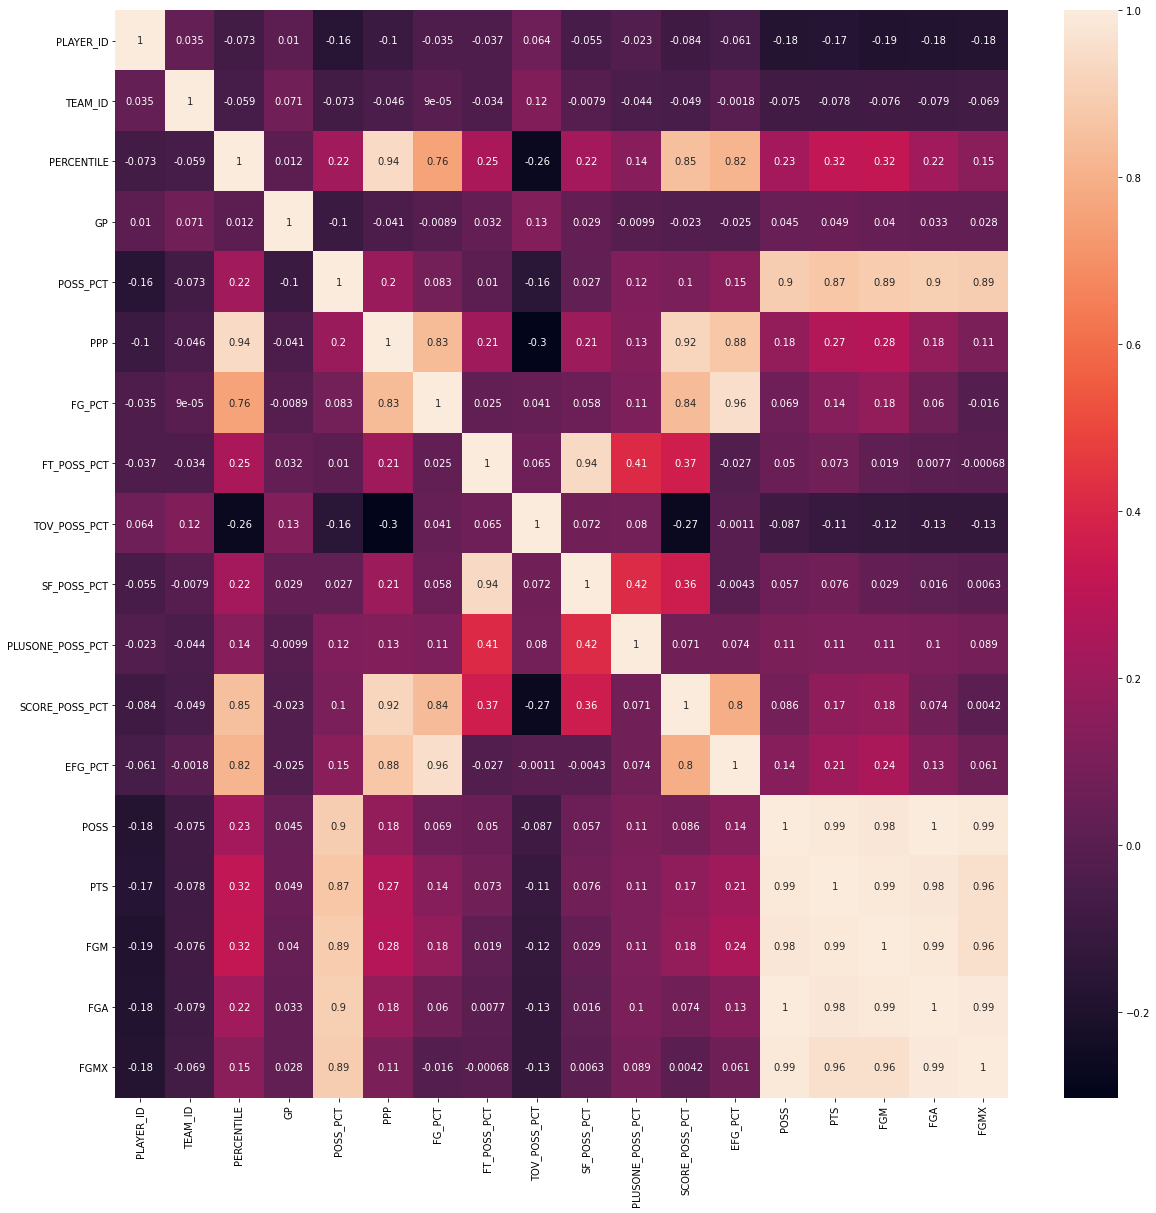

In [44]:
iso_off_frame = pd.DataFrame(new_response['resultSets'][0]['rowSet'])
iso_off_frame.columns = new_response['resultSets'][0]['headers']
print(iso_off_frame.shape)
display(iso_off_frame)
display(iso_off_frame.columns)
plt.figure(figsize=(20,20))
sns.heatmap(iso_off_frame.corr(), annot = True)
plt.show()

In [45]:
new_drops = ['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'PERCENTILE',
       'TEAM_NAME', 'PLAY_TYPE', 'TYPE_GROUPING', 'GP',  'FT_POSS_PCT', 'TOV_POSS_PCT',
       'SF_POSS_PCT', 'PLUSONE_POSS_PCT', 'EFG_PCT',   'POSS_PCT', 'PTS', 'FGMX'
       ]

In [46]:
iso_off_frame.drop(new_drops, axis=1, inplace=True)
print(iso_off_frame.columns)
print(iso_off_frame.shape)

Index(['PLAYER_ID', 'PLAYER_NAME', 'PPP', 'FG_PCT', 'SCORE_POSS_PCT', 'POSS',
       'FGM', 'FGA'],
      dtype='object')
(243, 8)


In [47]:
iso_off_frame.rename({
    
                 'SCORE_POSS_PCT': 'ISO percent ScorePoss',
                 'FGM': 'ISO FGM',
                 'FGA': 'ISO FGA',
                 'POSS' : 'ISO Poss',
                 'PPP' : 'ISO PPP',  
                 'FG_PCT': "ISO FG PCT" ,
                 'PLAYER_ID': 'isoID'
                  }, axis = 1, inplace = True)

In [48]:
data.drop('PLAYER_NAME', axis=1, inplace=True)
data = pd.merge(
    left=data,
    right=iso_off_frame,
    left_on='Player',
    right_on='PLAYER_NAME',
    how='left'
)
data = data[~data.Player.duplicated(keep='first')]

In [49]:
data[data['Player'] == "LeBron James"]

,Player,Advanced ASTpercent,Advanced OREBpercent,Advanced DREBpercent,Advanced REBpercent,Advanced TSpercent,Advanced USGpercent,Advanced PACE,Advanced PIE,postupdefense Poss,postupdefense PPP,Postupoffense Poss,Postupoffense PPP,putbacksoffense Poss,putbacksoffense PPP,Scoring percentPTS2PT_MR,Scoring percentPTS3PT,Scoring percentPTSFBPs,Scoring percentPTSFT,Scoring percentPTSOffTO,Scoring percentPTSPITP,Scoring 2FGMpercentAST,Scoring 3FGMpercentAST,Scoring FGMpercentAST,spotupoffense Poss,spotupoffense PPP,touches Time_OfPoss,touches Avg_Sec_PerTouch,touches Avg_Drib_PerTouch,TransitionOffensive Poss,TransitionOffensive PPP,PLAYER_ID,TEAM_ID,GP,MIN,DREB,STL,PCT_STL,BLK,PCT_BLK,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT,DEF_WS,HEIGHT,WEIGHT,POSITION,pnrmID,PickNRollMan percent Poss,PickNRollMan PPP,PickNRollMan FG PCT,PickNRollMan percent ScorePoss,PickNRollMan Poss,PickNRollMan FGM,PickNRollMan FGA,pnrhID,PickNRollHandler Poss,PickNRollHandler PPP,PickNRollHandler FG PCT,PickNRollHandler Poss,PickNRollHandler FGM,PickNRollHandler FGA,isoID,PLAYER_NAME,ISO PPP,ISO FG PCT,ISO percent ScorePoss,ISO Poss,ISO FGM,ISO FGA
105,LeBron James,47.9,2.9,18.7,11.0,56.9,30.8,101.26,19.2,0.3,0.43,2.5,0.92,0.7,1.51,8.9,25.7,19.4,14.8,17.6,50.5,25.9,48.6,30.9,1.6,1.08,7.4,4.78,3.79,5.2,1.12,2544.0,1.610613e+09,67.0,34.6,6.9,1.2,19.1,0.5,10.6,12.2,8.1,11.6,32.1,15.4,81.0,250.0,Forward,2544.0,0.008,1.077,0.417,0.385,0.2,0.1,0.2,2544.0,0.273,0.987,0.462,7.0,2.6,5.6,2544.0,LeBron James,0.9,0.393,0.4,4.5,1.4,3.7


In [50]:
display(data.columns)
data.info()

Index(['Player', 'Advanced ASTpercent', 'Advanced OREBpercent',
       'Advanced DREBpercent', 'Advanced REBpercent', 'Advanced TSpercent',
       'Advanced USGpercent', 'Advanced PACE', 'Advanced PIE',
       'postupdefense Poss', 'postupdefense PPP', 'Postupoffense Poss',
       'Postupoffense PPP', 'putbacksoffense Poss', 'putbacksoffense PPP',
       'Scoring percentPTS2PT_MR', 'Scoring percentPTS3PT',
       'Scoring percentPTSFBPs', 'Scoring percentPTSFT',
       'Scoring percentPTSOffTO', 'Scoring percentPTSPITP',
       'Scoring 2FGMpercentAST', 'Scoring 3FGMpercentAST',
       'Scoring FGMpercentAST', 'spotupoffense Poss', 'spotupoffense PPP',
       'touches Time_OfPoss', 'touches Avg_Sec_PerTouch',
       'touches Avg_Drib_PerTouch', 'TransitionOffensive Poss',
       'TransitionOffensive PPP', 'PLAYER_ID', 'TEAM_ID', 'GP', 'MIN', 'DREB',
       'STL', 'PCT_STL', 'BLK', 'PCT_BLK', 'OPP_PTS_OFF_TOV',
       'OPP_PTS_2ND_CHANCE', 'OPP_PTS_FB', 'OPP_PTS_PAINT', 'DEF_WS', 'HEIGH

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 0 to 466
Data columns (total 71 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Player                          458 non-null    object 
 1   Advanced ASTpercent             458 non-null    float64
 2   Advanced OREBpercent            458 non-null    float64
 3   Advanced DREBpercent            458 non-null    float64
 4   Advanced REBpercent             458 non-null    float64
 5   Advanced TSpercent              458 non-null    float64
 6   Advanced USGpercent             458 non-null    float64
 7   Advanced PACE                   458 non-null    float64
 8   Advanced PIE                    458 non-null    float64
 9   postupdefense Poss              458 non-null    float64
 10  postupdefense PPP               458 non-null    float64
 11  Postupoffense Poss              458 non-null    float64
 12  Postupoffense PPP               458 

In [51]:
display(data)

,Player,Advanced ASTpercent,Advanced OREBpercent,Advanced DREBpercent,Advanced REBpercent,Advanced TSpercent,Advanced USGpercent,Advanced PACE,Advanced PIE,postupdefense Poss,postupdefense PPP,Postupoffense Poss,Postupoffense PPP,putbacksoffense Poss,putbacksoffense PPP,Scoring percentPTS2PT_MR,Scoring percentPTS3PT,Scoring percentPTSFBPs,Scoring percentPTSFT,Scoring percentPTSOffTO,Scoring percentPTSPITP,Scoring 2FGMpercentAST,Scoring 3FGMpercentAST,Scoring FGMpercentAST,spotupoffense Poss,spotupoffense PPP,touches Time_OfPoss,touches Avg_Sec_PerTouch,touches Avg_Drib_PerTouch,TransitionOffensive Poss,TransitionOffensive PPP,PLAYER_ID,TEAM_ID,GP,MIN,DREB,STL,PCT_STL,BLK,PCT_BLK,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT,DEF_WS,HEIGHT,WEIGHT,POSITION,pnrmID,PickNRollMan percent Poss,PickNRollMan PPP,PickNRollMan FG PCT,PickNRollMan percent ScorePoss,PickNRollMan Poss,PickNRollMan FGM,PickNRollMan FGA,pnrhID,PickNRollHandler Poss,PickNRollHandler PPP,PickNRollHandler FG PCT,PickNRollHandler Poss,PickNRollHandler FGM,PickNRollHandler FGA,isoID,PLAYER_NAME,ISO PPP,ISO FG PCT,ISO percent ScorePoss,ISO Poss,ISO FGM,ISO FGA
0,Langston Galloway,8.8,1.8,6.5,4.1,58.3,14.5,100.78,7.4,0.2,1.14,0.0,0.00,0.2,0.50,7.3,58.8,16.1,11.4,14.2,22.5,73.3,100.0,88.4,3.3,1.20,0.9,1.94,1.25,1.6,1.32,204038.0,1.610613e+09,66.0,25.8,1.8,0.7,18.8,0.2,7.0,9.8,7.3,6.8,27.6,5.2,73.0,200.0,Guard,204038.0,0.025,1.000,0.357,0.333,0.2,0.1,0.2,204038.0,0.078,0.766,0.400,0.7,0.2,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Anfernee Simons,10.2,1.6,8.4,5.0,51.7,18.1,103.10,6.1,0.4,0.82,0.0,0.00,0.0,0.00,15.5,38.2,11.8,12.7,13.5,33.5,35.0,68.8,46.5,2.4,0.89,2.1,3.80,3.25,1.4,0.93,1629014.0,1.610613e+09,70.0,20.7,1.8,0.4,16.0,0.1,5.9,6.9,6.6,6.3,20.6,3.3,75.0,181.0,Guard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1629014.0,0.311,0.884,0.404,2.8,1.0,2.4,1629014.0,Anfernee Simons,1.000,0.385,0.427,1.1,0.4,0.9
2,Bobby Portis,11.9,5.9,18.1,11.8,51.3,20.2,101.75,10.3,0.7,0.89,2.1,0.81,1.1,0.90,13.1,31.8,6.0,10.8,14.6,44.3,52.3,98.2,64.7,2.7,0.99,1.1,1.68,0.69,1.0,1.29,1626171.0,1.610613e+09,66.0,21.1,3.9,0.5,15.4,0.3,13.8,7.6,5.7,4.9,19.2,5.4,82.0,250.0,Forward,1626171.0,0.158,0.991,0.446,0.450,1.7,0.7,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1626171.0,Bobby Portis,0.800,0.400,0.400,0.5,0.2,0.5
3,Coby White,15.5,1.7,13.0,6.9,47.7,22.3,102.28,7.6,0.2,1.17,0.0,0.00,0.0,0.00,6.9,48.0,20.1,11.1,20.3,34.0,28.0,78.6,50.2,3.4,0.94,2.7,3.82,3.21,2.5,1.06,1629632.0,1.610613e+09,65.0,25.8,3.1,0.8,14.0,0.1,4.2,9.0,6.6,7.1,26.8,7.7,77.0,195.0,Guard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1629632.0,0.344,0.799,0.395,5.0,1.6,4.0,1629632.0,Coby White,0.786,0.353,0.357,0.9,0.3,0.8
4,Dorian Finney-Smith,6.8,6.7,11.2,9.0,59.4,12.8,99.37,7.1,1.0,0.84,0.0,0.00,1.0,1.04,1.2,51.6,15.9,11.6,16.1,35.6,56.8,96.6,76.1,3.8,1.03,1.1,1.85,0.85,1.6,1.24,1627827.0,1.610613e+09,71.0,29.9,3.7,0.6,17.1,0.5,19.6,8.9,8.4,9.9,30.0,8.2,79.0,220.0,Forward,1627827.0,0.077,1.000,0.475,0.429,0.7,0.3,0.6,1627827.0,0.034,0.818,0.412,0.3,0.1,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,Josh Gray,15.4,5.3,4.0,4.5,50.0,13.7,99.31,-2.4,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.00,1.2,3.29,2.93,0.0,0.00,1627982.0,1.610613e+09,2.0,11.4,0.5,0.0,0.0,0.0,0.0,7.0,4.0,5.5,11.0,8.7,72.0,180.0,Guard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
463,Marial Shayok,11.1,0.0,27.3,13.6,30.0,21.4,116.34,3.3,0.0,0.00,0.0,0.00,0.0,0.00,0.0,100.0,100.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.00,0.4,2.87,2.40,0.0,0.00,1629621.0,1.610613e+09,4.0,7.0,1.5,0.0,0.0,0.3,33.3,4.8,3.5,2.5,6.5,0.4,77.0,198.0,Guard-Forward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
464,

In [52]:
iso_off_frame.to_csv("NBA_Player_iso_2019-20_Season.csv", index=True)

<br>

## Get Hustle Data

In [53]:
new_url = 'https://stats.nba.com/stats/leaguehustlestatsplayer?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&Height=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=PerGame&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season=2019-20&SeasonSegment=&SeasonType=Regular%20Season&TeamID=0&VsConference=&VsDivision=&Weight='

In [54]:
new_response = requests.get(url=new_url, headers=headers).json()

In [55]:
hustle_frame = pd.DataFrame(new_response['resultSets'][0]['rowSet'])
hustle_frame.columns = new_response['resultSets'][0]['headers']
print(hustle_frame.shape)
display(hustle_frame)
display(hustle_frame.columns)

(529, 28)


,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,G,MIN,CONTESTED_SHOTS,CONTESTED_SHOTS_2PT,CONTESTED_SHOTS_3PT,DEFLECTIONS,CHARGES_DRAWN,SCREEN_ASSISTS,SCREEN_AST_PTS,OFF_LOOSE_BALLS_RECOVERED,DEF_LOOSE_BALLS_RECOVERED,LOOSE_BALLS_RECOVERED,PCT_LOOSE_BALLS_RECOVERED_OFF,PCT_LOOSE_BALLS_RECOVERED_DEF,OFF_BOXOUTS,DEF_BOXOUTS,BOX_OUTS,BOX_OUT_PLAYER_TEAM_REBS,BOX_OUT_PLAYER_REBS,PCT_BOX_OUTS_OFF,PCT_BOX_OUTS_DEF,PCT_BOX_OUTS_TEAM_REB,PCT_BOX_OUTS_REB
0,203932,Aaron Gordon,1610612753,ORL,24.0,62,32.5,5.32,3.37,1.95,1.02,0.02,0.89,1.92,0.53,0.55,1.08,0.493,0.507,0.23,0.85,1.08,0.63,0.34,0.209,0.791,0.929,0.500
1,1628988,Aaron Holiday,1610612754,IND,23.0,66,24.5,6.24,2.95,3.29,1.68,0.05,0.20,0.47,0.33,0.36,0.70,0.478,0.522,0.03,1.00,1.03,0.62,0.08,0.029,0.971,0.719,0.088
2,1627846,Abdel Nader,1610612760,OKC,26.0,55,15.8,4.05,2.31,1.75,0.98,0.00,0.13,0.29,0.22,0.31,0.53,0.414,0.586,0.00,0.78,0.78,0.38,0.11,0.000,1.000,0.750,0.214
3,1629690,Adam Mokoka,1610612741,CHI,21.0,11,10.2,1.27,0.36,0.91,0.91,0.00,0.09,0.18,0.18,0.09,0.27,0.667,0.333,0.27,0.55,0.82,0.36,0.18,0.333,0.667,1.000,0.500
4,1629678,Admiral Schofield,1610612764,WAS,23.0,33,11.2,2.48,1.55,0.94,0.45,0.03,0.70,1.61,0.15,0.12,0.27,0.556,0.444,0.03,1.12,1.15,0.45,0.12,0.026,0.974,0.833,0.222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,203897,Zach LaVine,1610612741,CHI,25.0,60,34.8,6.15,2.65,3.50,2.07,0.00,0.35,0.77,0.42,0.47,0.88,0.472,0.528,0.07,0.80,0.87,0.50,0.15,0.077,0.923,0.882,0.265
525,1629668,Zach Norvell Jr.,1610612744,GSW,22.0,5,8.2,1.40,0.20,1.20,0.20,0.20,0.00,0.00,0.00,0.60,0.60,0.000,1.000,0.00,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.000
526,1629015,Zhaire Smith,1610612755,PHI,21.0,7,4.6,1.29,0.71,0.57,1.14,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.000,0.00,0.14,0.14,0.00,0.00,0.000,1.000,0.000,0.000
527,1629627,Zion Williamson,1610612740,NOP,19.0,24,27.8,7.08,3.75,3.33,1.50,0.04,1.83,4.29,1.00,0.50,1.50,0.667,0.333,0.08,1.08,1.17,0.38,0.29,0.071,0.929,0.818,0.636


Index(['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE', 'G',
       'MIN', 'CONTESTED_SHOTS', 'CONTESTED_SHOTS_2PT', 'CONTESTED_SHOTS_3PT',
       'DEFLECTIONS', 'CHARGES_DRAWN', 'SCREEN_ASSISTS', 'SCREEN_AST_PTS',
       'OFF_LOOSE_BALLS_RECOVERED', 'DEF_LOOSE_BALLS_RECOVERED',
       'LOOSE_BALLS_RECOVERED', 'PCT_LOOSE_BALLS_RECOVERED_OFF',
       'PCT_LOOSE_BALLS_RECOVERED_DEF', 'OFF_BOXOUTS', 'DEF_BOXOUTS',
       'BOX_OUTS', 'BOX_OUT_PLAYER_TEAM_REBS', 'BOX_OUT_PLAYER_REBS',
       'PCT_BOX_OUTS_OFF', 'PCT_BOX_OUTS_DEF', 'PCT_BOX_OUTS_TEAM_REB',
       'PCT_BOX_OUTS_REB'],
      dtype='object')

In [56]:
new_drops = ['TEAM_ID', 'G', 'OFF_BOXOUTS', 'DEF_BOXOUTS',
       'MIN', 'PCT_LOOSE_BALLS_RECOVERED_OFF',
       'PCT_LOOSE_BALLS_RECOVERED_DEF', 'BOX_OUT_PLAYER_TEAM_REBS', 'BOX_OUT_PLAYER_REBS',
       'PCT_BOX_OUTS_OFF', 'PCT_BOX_OUTS_DEF', 'PCT_BOX_OUTS_TEAM_REB',
       'PCT_BOX_OUTS_REB', 'OFF_LOOSE_BALLS_RECOVERED', 'DEF_LOOSE_BALLS_RECOVERED',]

In [57]:
hustle_frame.drop(new_drops, axis=1, inplace=True)
print(hustle_frame.columns)
print(hustle_frame.shape)

Index(['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ABBREVIATION', 'AGE',
       'CONTESTED_SHOTS', 'CONTESTED_SHOTS_2PT', 'CONTESTED_SHOTS_3PT',
       'DEFLECTIONS', 'CHARGES_DRAWN', 'SCREEN_ASSISTS', 'SCREEN_AST_PTS',
       'LOOSE_BALLS_RECOVERED', 'BOX_OUTS'],
      dtype='object')
(529, 13)


In [58]:
hustle_frame.rename({'PLAYER_ID': 'hustleID'}, axis = 1, inplace = True)

In [59]:
data.drop('PLAYER_NAME', axis=1, inplace=True)
data = pd.merge(
    left=data,
    right=hustle_frame,
    left_on='Player',
    right_on='PLAYER_NAME',
    how='left'
)
data = data[~data.Player.duplicated(keep='first')]

In [60]:
data[data['Player'] == "LeBron James"]

,Player,Advanced ASTpercent,Advanced OREBpercent,Advanced DREBpercent,Advanced REBpercent,Advanced TSpercent,Advanced USGpercent,Advanced PACE,Advanced PIE,postupdefense Poss,postupdefense PPP,Postupoffense Poss,Postupoffense PPP,putbacksoffense Poss,putbacksoffense PPP,Scoring percentPTS2PT_MR,Scoring percentPTS3PT,Scoring percentPTSFBPs,Scoring percentPTSFT,Scoring percentPTSOffTO,Scoring percentPTSPITP,Scoring 2FGMpercentAST,Scoring 3FGMpercentAST,Scoring FGMpercentAST,spotupoffense Poss,spotupoffense PPP,touches Time_OfPoss,touches Avg_Sec_PerTouch,touches Avg_Drib_PerTouch,TransitionOffensive Poss,TransitionOffensive PPP,PLAYER_ID,TEAM_ID,GP,MIN,DREB,STL,PCT_STL,BLK,PCT_BLK,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT,DEF_WS,HEIGHT,WEIGHT,POSITION,pnrmID,PickNRollMan percent Poss,PickNRollMan PPP,PickNRollMan FG PCT,PickNRollMan percent ScorePoss,PickNRollMan Poss,PickNRollMan FGM,PickNRollMan FGA,pnrhID,PickNRollHandler Poss,PickNRollHandler PPP,PickNRollHandler FG PCT,PickNRollHandler Poss,PickNRollHandler FGM,PickNRollHandler FGA,isoID,ISO PPP,ISO FG PCT,ISO percent ScorePoss,ISO Poss,ISO FGM,ISO FGA,hustleID,PLAYER_NAME,TEAM_ABBREVIATION,AGE,CONTESTED_SHOTS,CONTESTED_SHOTS_2PT,CONTESTED_SHOTS_3PT,DEFLECTIONS,CHARGES_DRAWN,SCREEN_ASSISTS,SCREEN_AST_PTS,LOOSE_BALLS_RECOVERED,BOX_OUTS
103,LeBron James,47.9,2.9,18.7,11.0,56.9,30.8,101.26,19.2,0.3,0.43,2.5,0.92,0.7,1.51,8.9,25.7,19.4,14.8,17.6,50.5,25.9,48.6,30.9,1.6,1.08,7.4,4.78,3.79,5.2,1.12,2544.0,1.610613e+09,67.0,34.6,6.9,1.2,19.1,0.5,10.6,12.2,8.1,11.6,32.1,15.4,81.0,250.0,Forward,2544.0,0.008,1.077,0.417,0.385,0.2,0.1,0.2,2544.0,0.273,0.987,0.462,7.0,2.6,5.6,2544.0,0.9,0.393,0.4,4.5,1.4,3.7,2544.0,LeBron James,LAL,35.0,4.09,2.25,1.84,1.93,0.15,0.46,1.04,1.16,1.57


In [61]:
display(data.columns)
data.info()

Index(['Player', 'Advanced ASTpercent', 'Advanced OREBpercent',
       'Advanced DREBpercent', 'Advanced REBpercent', 'Advanced TSpercent',
       'Advanced USGpercent', 'Advanced PACE', 'Advanced PIE',
       'postupdefense Poss', 'postupdefense PPP', 'Postupoffense Poss',
       'Postupoffense PPP', 'putbacksoffense Poss', 'putbacksoffense PPP',
       'Scoring percentPTS2PT_MR', 'Scoring percentPTS3PT',
       'Scoring percentPTSFBPs', 'Scoring percentPTSFT',
       'Scoring percentPTSOffTO', 'Scoring percentPTSPITP',
       'Scoring 2FGMpercentAST', 'Scoring 3FGMpercentAST',
       'Scoring FGMpercentAST', 'spotupoffense Poss', 'spotupoffense PPP',
       'touches Time_OfPoss', 'touches Avg_Sec_PerTouch',
       'touches Avg_Drib_PerTouch', 'TransitionOffensive Poss',
       'TransitionOffensive PPP', 'PLAYER_ID', 'TEAM_ID', 'GP', 'MIN', 'DREB',
       'STL', 'PCT_STL', 'BLK', 'PCT_BLK', 'OPP_PTS_OFF_TOV',
       'OPP_PTS_2ND_CHANCE', 'OPP_PTS_FB', 'OPP_PTS_PAINT', 'DEF_WS', 'HEIGH

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 0 to 457
Data columns (total 83 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Player                          458 non-null    object 
 1   Advanced ASTpercent             458 non-null    float64
 2   Advanced OREBpercent            458 non-null    float64
 3   Advanced DREBpercent            458 non-null    float64
 4   Advanced REBpercent             458 non-null    float64
 5   Advanced TSpercent              458 non-null    float64
 6   Advanced USGpercent             458 non-null    float64
 7   Advanced PACE                   458 non-null    float64
 8   Advanced PIE                    458 non-null    float64
 9   postupdefense Poss              458 non-null    float64
 10  postupdefense PPP               458 non-null    float64
 11  Postupoffense Poss              458 non-null    float64
 12  Postupoffense PPP               458 

In [62]:
display(data)

,Player,Advanced ASTpercent,Advanced OREBpercent,Advanced DREBpercent,Advanced REBpercent,Advanced TSpercent,Advanced USGpercent,Advanced PACE,Advanced PIE,postupdefense Poss,postupdefense PPP,Postupoffense Poss,Postupoffense PPP,putbacksoffense Poss,putbacksoffense PPP,Scoring percentPTS2PT_MR,Scoring percentPTS3PT,Scoring percentPTSFBPs,Scoring percentPTSFT,Scoring percentPTSOffTO,Scoring percentPTSPITP,Scoring 2FGMpercentAST,Scoring 3FGMpercentAST,Scoring FGMpercentAST,spotupoffense Poss,spotupoffense PPP,touches Time_OfPoss,touches Avg_Sec_PerTouch,touches Avg_Drib_PerTouch,TransitionOffensive Poss,TransitionOffensive PPP,PLAYER_ID,TEAM_ID,GP,MIN,DREB,STL,PCT_STL,BLK,PCT_BLK,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT,DEF_WS,HEIGHT,WEIGHT,POSITION,pnrmID,PickNRollMan percent Poss,PickNRollMan PPP,PickNRollMan FG PCT,PickNRollMan percent ScorePoss,PickNRollMan Poss,PickNRollMan FGM,PickNRollMan FGA,pnrhID,PickNRollHandler Poss,PickNRollHandler PPP,PickNRollHandler FG PCT,PickNRollHandler Poss,PickNRollHandler FGM,PickNRollHandler FGA,isoID,ISO PPP,ISO FG PCT,ISO percent ScorePoss,ISO Poss,ISO FGM,ISO FGA,hustleID,PLAYER_NAME,TEAM_ABBREVIATION,AGE,CONTESTED_SHOTS,CONTESTED_SHOTS_2PT,CONTESTED_SHOTS_3PT,DEFLECTIONS,CHARGES_DRAWN,SCREEN_ASSISTS,SCREEN_AST_PTS,LOOSE_BALLS_RECOVERED,BOX_OUTS
0,Langston Galloway,8.8,1.8,6.5,4.1,58.3,14.5,100.78,7.4,0.2,1.14,0.0,0.00,0.2,0.50,7.3,58.8,16.1,11.4,14.2,22.5,73.3,100.0,88.4,3.3,1.20,0.9,1.94,1.25,1.6,1.32,204038.0,1.610613e+09,66.0,25.8,1.8,0.7,18.8,0.2,7.0,9.8,7.3,6.8,27.6,5.2,73.0,200.0,Guard,204038.0,0.025,1.000,0.357,0.333,0.2,0.1,0.2,204038.0,0.078,0.766,0.400,0.7,0.2,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204038.0,Langston Galloway,DET,28.0,5.00,2.59,2.41,1.30,0.11,0.12,0.27,0.94,0.56
1,Anfernee Simons,10.2,1.6,8.4,5.0,51.7,18.1,103.10,6.1,0.4,0.82,0.0,0.00,0.0,0.00,15.5,38.2,11.8,12.7,13.5,33.5,35.0,68.8,46.5,2.4,0.89,2.1,3.80,3.25,1.4,0.93,1629014.0,1.610613e+09,70.0,20.7,1.8,0.4,16.0,0.1,5.9,6.9,6.6,6.3,20.6,3.3,75.0,181.0,Guard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1629014.0,0.311,0.884,0.404,2.8,1.0,2.4,1629014.0,1.000,0.385,0.427,1.1,0.4,0.9,1629014.0,Anfernee Simons,POR,21.0,5.14,2.64,2.50,0.54,0.01,0.13,0.31,0.59,0.20
2,Bobby Portis,11.9,5.9,18.1,11.8,51.3,20.2,101.75,10.3,0.7,0.89,2.1,0.81,1.1,0.90,13.1,31.8,6.0,10.8,14.6,44.3,52.3,98.2,64.7,2.7,0.99,1.1,1.68,0.69,1.0,1.29,1626171.0,1.610613e+09,66.0,21.1,3.9,0.5,15.4,0.3,13.8,7.6,5.7,4.9,19.2,5.4,82.0,250.0,Forward,1626171.0,0.158,0.991,0.446,0.450,1.7,0.7,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1626171.0,0.800,0.400,0.400,0.5,0.2,0.5,1626171.0,Bobby Portis,NYK,25.0,5.94,3.50,2.44,0.79,0.02,1.41,3.14,0.52,4.11
3,Coby White,15.5,1.7,13.0,6.9,47.7,22.3,102.28,7.6,0.2,1.17,0.0,0.00,0.0,0.00,6.9,48.0,20.1,11.1,20.3,34.0,28.0,78.6,50.2,3.4,0.94,2.7,3.82,3.21,2.5,1.06,1629632.0,1.610613e+09,65.0,25.8,3.1,0.8,14.0,0.1,4.2,9.0,6.6,7.1,26.8,7.7,77.0,195.0,Guard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1629632.0,0.344,0.799,0.395,5.0,1.6,4.0,1629632.0,0.786,0.353,0.357,0.9,0.3,0.8,1629632.0,Coby White,CHI,20.0,4.54,2.17,2.37,1.32,0.06,0.06,0.14,0.94,0.20
4,Dorian Finney-Smith,6.8,6.7,11.2,9.0,59.4,12.8,99.37,7.1,1.0,0.84,0.0,0.00,1.0,1.04,1.2,51.6,15.9,11.6,16.1,35.6,56.8,96.6,76.1,3.8,1.03,1.1,1.85,0.85,1.6,1.24,1627827.0,1.610613e+09,71.0,29.9,3.7,0.6,17.1,0.5,19.6,8.9,8.4,9.9,30.0,8.2,79.0,220.0,Forward,1627827.0,0.077,1.000,0.475,0.429,0.7,0.3,0.6,1627827.0,0.034,0.818,0.412,0.3,0.1,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1627827.0,Dorian Finney-Smith,DAL,27.0,8.55,4.92,3.63,1.55,0.03,0.41,1.03,0.94,1.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,Josh Gray,15.4,5.3,4.0,4.5,50.0,13.7,99.31,-2.4,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0

In [63]:
hustle_frame.to_csv("NBA_Player_Hustle_2019-20_Season.csv", index=True)

<br>

## Get Cutting Play Style Data

In [64]:
new_url = 'https://stats.nba.com/stats/synergyplaytypes?LeagueID=00&PerMode=PerGame&PlayType=Cut&PlayerOrTeam=P&SeasonType=Regular%20Season&SeasonYear=2019-20&TypeGrouping=offensive'

In [65]:
new_response = requests.get(url=new_url, headers=headers).json()

In [66]:
cutting_frame = pd.DataFrame(new_response['resultSets'][0]['rowSet'])
cutting_frame.columns = new_response['resultSets'][0]['headers']
print(cutting_frame.shape)
display(cutting_frame)
display(cutting_frame.columns)

(337, 24)


,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,PLAY_TYPE,TYPE_GROUPING,PERCENTILE,GP,POSS_PCT,PPP,FG_PCT,FT_POSS_PCT,TOV_POSS_PCT,SF_POSS_PCT,PLUSONE_POSS_PCT,SCORE_POSS_PCT,EFG_PCT,POSS,PTS,FGM,FGA,FGMX
0,22019,203497,Rudy Gobert,1610612762,UTA,Utah Jazz,Cut,Offensive,0.785,68,0.274,1.427,0.753,0.241,0.046,0.228,0.046,0.734,0.753,3.5,5.1,2.0,2.7,0.7
1,22019,1628389,Bam Adebayo,1610612748,MIA,Miami Heat,Cut,Offensive,0.279,72,0.240,1.146,0.591,0.150,0.079,0.143,0.036,0.586,0.591,3.9,4.5,1.8,3.1,1.3
2,22019,202355,Hassan Whiteside,1610612757,POR,Portland Trail Blazers,Cut,Offensive,0.642,67,0.208,1.351,0.693,0.225,0.079,0.220,0.110,0.665,0.693,2.9,3.9,1.6,2.3,0.7
3,22019,1628386,Jarrett Allen,1610612751,BKN,Brooklyn Nets,Cut,Offensive,0.506,70,0.266,1.288,0.679,0.232,0.040,0.232,0.062,0.655,0.679,2.5,3.3,1.4,2.0,0.6
4,22019,203991,Clint Capela,1610612745,HOU,Houston Rockets,Cut,Offensive,0.387,39,0.381,1.207,0.669,0.138,0.101,0.133,0.043,0.617,0.669,4.8,5.8,2.6,3.9,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,22019,202334,Ed Davis,1610612762,UTA,Utah Jazz,Cut,Offensive,0.000,28,0.292,0.579,0.313,0.053,0.105,0.053,0.000,0.316,0.313,0.7,0.4,0.2,0.6,0.4
333,22019,201571,D.J. Augustin,1610612753,ORL,Orlando Magic,Cut,Offensive,0.082,57,0.016,1.000,0.500,0.200,0.200,0.200,0.000,0.500,0.500,0.2,0.2,0.1,0.1,0.1
334,22019,1629641,Romeo Langford,1610612738,BOS,Boston Celtics,Cut,Offensive,0.015,32,0.118,0.833,0.333,0.250,0.000,0.250,0.000,0.417,0.333,0.4,0.3,0.1,0.3,0.2
335,22019,1629636,Darius Garland,1610612739,CLE,Cleveland Cavaliers,Cut,Offensive,0.026,59,0.011,0.900,0.444,0.100,0.100,0.100,0.100,0.400,0.444,0.2,0.2,0.1,0.2,0.1


Index(['SEASON_ID', 'PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'TEAM_NAME', 'PLAY_TYPE', 'TYPE_GROUPING', 'PERCENTILE', 'GP',
       'POSS_PCT', 'PPP', 'FG_PCT', 'FT_POSS_PCT', 'TOV_POSS_PCT',
       'SF_POSS_PCT', 'PLUSONE_POSS_PCT', 'SCORE_POSS_PCT', 'EFG_PCT', 'POSS',
       'PTS', 'FGM', 'FGA', 'FGMX'],
      dtype='object')

In [67]:
new_drops = ['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'TEAM_NAME', 'PLAY_TYPE', 'TYPE_GROUPING', 'GP', 'PLUSONE_POSS_PCT', 'EFG_PCT', 'PTS', 'FT_POSS_PCT', 'TOV_POSS_PCT',
       'SF_POSS_PCT', 'PERCENTILE', 'FGMX', 'SCORE_POSS_PCT', 'POSS_PCT',
       ]

In [68]:
cutting_frame.drop(new_drops, axis=1, inplace=True)
print(cutting_frame.columns)
print(cutting_frame.shape)

Index(['PLAYER_ID', 'PLAYER_NAME', 'PPP', 'FG_PCT', 'POSS', 'FGM', 'FGA'], dtype='object')
(337, 7)


In [69]:
cutting_frame.rename({'PLAYER_ID': 'cuttID',
                 'POSS': 'Cutting Poss',
                 'FGM': 'Cutting FGM',
                 'FGA': 'Cutting FGA',
                 'PPP' : 'Cutting PPP',
                 'FG_PCT' : "Cutting FG PCT"}, axis = 1, inplace = True)

In [70]:
data.drop('PLAYER_NAME', axis=1, inplace=True)
data = pd.merge(
    left=data,
    right=cutting_frame,
    left_on='Player',
    right_on='PLAYER_NAME',
    how='left'
)
data = data[~data.Player.duplicated(keep='first')]

In [71]:
data[data['Player'] == "LeBron James"]

,Player,Advanced ASTpercent,Advanced OREBpercent,Advanced DREBpercent,Advanced REBpercent,Advanced TSpercent,Advanced USGpercent,Advanced PACE,Advanced PIE,postupdefense Poss,postupdefense PPP,Postupoffense Poss,Postupoffense PPP,putbacksoffense Poss,putbacksoffense PPP,Scoring percentPTS2PT_MR,Scoring percentPTS3PT,Scoring percentPTSFBPs,Scoring percentPTSFT,Scoring percentPTSOffTO,Scoring percentPTSPITP,Scoring 2FGMpercentAST,Scoring 3FGMpercentAST,Scoring FGMpercentAST,spotupoffense Poss,spotupoffense PPP,touches Time_OfPoss,touches Avg_Sec_PerTouch,touches Avg_Drib_PerTouch,TransitionOffensive Poss,TransitionOffensive PPP,PLAYER_ID,TEAM_ID,GP,MIN,DREB,STL,PCT_STL,BLK,PCT_BLK,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT,DEF_WS,HEIGHT,WEIGHT,POSITION,pnrmID,PickNRollMan percent Poss,PickNRollMan PPP,PickNRollMan FG PCT,PickNRollMan percent ScorePoss,PickNRollMan Poss,PickNRollMan FGM,PickNRollMan FGA,pnrhID,PickNRollHandler Poss,PickNRollHandler PPP,PickNRollHandler FG PCT,PickNRollHandler Poss,PickNRollHandler FGM,PickNRollHandler FGA,isoID,ISO PPP,ISO FG PCT,ISO percent ScorePoss,ISO Poss,ISO FGM,ISO FGA,hustleID,TEAM_ABBREVIATION,AGE,CONTESTED_SHOTS,CONTESTED_SHOTS_2PT,CONTESTED_SHOTS_3PT,DEFLECTIONS,CHARGES_DRAWN,SCREEN_ASSISTS,SCREEN_AST_PTS,LOOSE_BALLS_RECOVERED,BOX_OUTS,cuttID,PLAYER_NAME,Cutting PPP,Cutting FG PCT,Cutting Poss,Cutting FGM,Cutting FGA
108,LeBron James,47.9,2.9,18.7,11.0,56.9,30.8,101.26,19.2,0.3,0.43,2.5,0.92,0.7,1.51,8.9,25.7,19.4,14.8,17.6,50.5,25.9,48.6,30.9,1.6,1.08,7.4,4.78,3.79,5.2,1.12,2544.0,1.610613e+09,67.0,34.6,6.9,1.2,19.1,0.5,10.6,12.2,8.1,11.6,32.1,15.4,81.0,250.0,Forward,2544.0,0.008,1.077,0.417,0.385,0.2,0.1,0.2,2544.0,0.273,0.987,0.462,7.0,2.6,5.6,2544.0,0.9,0.393,0.4,4.5,1.4,3.7,2544.0,LAL,35.0,4.09,2.25,1.84,1.93,0.15,0.46,1.04,1.16,1.57,2544.0,LeBron James,1.404,0.745,0.9,0.5,0.7


In [72]:
display(data.columns)
data.info()

Index(['Player', 'Advanced ASTpercent', 'Advanced OREBpercent',
       'Advanced DREBpercent', 'Advanced REBpercent', 'Advanced TSpercent',
       'Advanced USGpercent', 'Advanced PACE', 'Advanced PIE',
       'postupdefense Poss', 'postupdefense PPP', 'Postupoffense Poss',
       'Postupoffense PPP', 'putbacksoffense Poss', 'putbacksoffense PPP',
       'Scoring percentPTS2PT_MR', 'Scoring percentPTS3PT',
       'Scoring percentPTSFBPs', 'Scoring percentPTSFT',
       'Scoring percentPTSOffTO', 'Scoring percentPTSPITP',
       'Scoring 2FGMpercentAST', 'Scoring 3FGMpercentAST',
       'Scoring FGMpercentAST', 'spotupoffense Poss', 'spotupoffense PPP',
       'touches Time_OfPoss', 'touches Avg_Sec_PerTouch',
       'touches Avg_Drib_PerTouch', 'TransitionOffensive Poss',
       'TransitionOffensive PPP', 'PLAYER_ID', 'TEAM_ID', 'GP', 'MIN', 'DREB',
       'STL', 'PCT_STL', 'BLK', 'PCT_BLK', 'OPP_PTS_OFF_TOV',
       'OPP_PTS_2ND_CHANCE', 'OPP_PTS_FB', 'OPP_PTS_PAINT', 'DEF_WS', 'HEIGH

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 0 to 471
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Player                          458 non-null    object 
 1   Advanced ASTpercent             458 non-null    float64
 2   Advanced OREBpercent            458 non-null    float64
 3   Advanced DREBpercent            458 non-null    float64
 4   Advanced REBpercent             458 non-null    float64
 5   Advanced TSpercent              458 non-null    float64
 6   Advanced USGpercent             458 non-null    float64
 7   Advanced PACE                   458 non-null    float64
 8   Advanced PIE                    458 non-null    float64
 9   postupdefense Poss              458 non-null    float64
 10  postupdefense PPP               458 non-null    float64
 11  Postupoffense Poss              458 non-null    float64
 12  Postupoffense PPP               458 

In [73]:
display(data)

,Player,Advanced ASTpercent,Advanced OREBpercent,Advanced DREBpercent,Advanced REBpercent,Advanced TSpercent,Advanced USGpercent,Advanced PACE,Advanced PIE,postupdefense Poss,postupdefense PPP,Postupoffense Poss,Postupoffense PPP,putbacksoffense Poss,putbacksoffense PPP,Scoring percentPTS2PT_MR,Scoring percentPTS3PT,Scoring percentPTSFBPs,Scoring percentPTSFT,Scoring percentPTSOffTO,Scoring percentPTSPITP,Scoring 2FGMpercentAST,Scoring 3FGMpercentAST,Scoring FGMpercentAST,spotupoffense Poss,spotupoffense PPP,touches Time_OfPoss,touches Avg_Sec_PerTouch,touches Avg_Drib_PerTouch,TransitionOffensive Poss,TransitionOffensive PPP,PLAYER_ID,TEAM_ID,GP,MIN,DREB,STL,PCT_STL,BLK,PCT_BLK,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT,DEF_WS,HEIGHT,WEIGHT,POSITION,pnrmID,PickNRollMan percent Poss,PickNRollMan PPP,PickNRollMan FG PCT,PickNRollMan percent ScorePoss,PickNRollMan Poss,PickNRollMan FGM,PickNRollMan FGA,pnrhID,PickNRollHandler Poss,PickNRollHandler PPP,PickNRollHandler FG PCT,PickNRollHandler Poss,PickNRollHandler FGM,PickNRollHandler FGA,isoID,ISO PPP,ISO FG PCT,ISO percent ScorePoss,ISO Poss,ISO FGM,ISO FGA,hustleID,TEAM_ABBREVIATION,AGE,CONTESTED_SHOTS,CONTESTED_SHOTS_2PT,CONTESTED_SHOTS_3PT,DEFLECTIONS,CHARGES_DRAWN,SCREEN_ASSISTS,SCREEN_AST_PTS,LOOSE_BALLS_RECOVERED,BOX_OUTS,cuttID,PLAYER_NAME,Cutting PPP,Cutting FG PCT,Cutting Poss,Cutting FGM,Cutting FGA
0,Langston Galloway,8.8,1.8,6.5,4.1,58.3,14.5,100.78,7.4,0.2,1.14,0.0,0.00,0.2,0.50,7.3,58.8,16.1,11.4,14.2,22.5,73.3,100.0,88.4,3.3,1.20,0.9,1.94,1.25,1.6,1.32,204038.0,1.610613e+09,66.0,25.8,1.8,0.7,18.8,0.2,7.0,9.8,7.3,6.8,27.6,5.2,73.0,200.0,Guard,204038.0,0.025,1.000,0.357,0.333,0.2,0.1,0.2,204038.0,0.078,0.766,0.400,0.7,0.2,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204038.0,DET,28.0,5.00,2.59,2.41,1.30,0.11,0.12,0.27,0.94,0.56,204038.0,Langston Galloway,1.091,0.667,0.2,0.1,0.1
1,Anfernee Simons,10.2,1.6,8.4,5.0,51.7,18.1,103.10,6.1,0.4,0.82,0.0,0.00,0.0,0.00,15.5,38.2,11.8,12.7,13.5,33.5,35.0,68.8,46.5,2.4,0.89,2.1,3.80,3.25,1.4,0.93,1629014.0,1.610613e+09,70.0,20.7,1.8,0.4,16.0,0.1,5.9,6.9,6.6,6.3,20.6,3.3,75.0,181.0,Guard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1629014.0,0.311,0.884,0.404,2.8,1.0,2.4,1629014.0,1.000,0.385,0.427,1.1,0.4,0.9,1629014.0,POR,21.0,5.14,2.64,2.50,0.54,0.01,0.13,0.31,0.59,0.20,1629014.0,Anfernee Simons,1.500,0.813,0.3,0.2,0.2
2,Bobby Portis,11.9,5.9,18.1,11.8,51.3,20.2,101.75,10.3,0.7,0.89,2.1,0.81,1.1,0.90,13.1,31.8,6.0,10.8,14.6,44.3,52.3,98.2,64.7,2.7,0.99,1.1,1.68,0.69,1.0,1.29,1626171.0,1.610613e+09,66.0,21.1,3.9,0.5,15.4,0.3,13.8,7.6,5.7,4.9,19.2,5.4,82.0,250.0,Forward,1626171.0,0.158,0.991,0.446,0.450,1.7,0.7,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1626171.0,0.800,0.400,0.400,0.5,0.2,0.5,1626171.0,NYK,25.0,5.94,3.50,2.44,0.79,0.02,1.41,3.14,0.52,4.11,1626171.0,Bobby Portis,1.031,0.583,0.5,0.2,0.4
3,Coby White,15.5,1.7,13.0,6.9,47.7,22.3,102.28,7.6,0.2,1.17,0.0,0.00,0.0,0.00,6.9,48.0,20.1,11.1,20.3,34.0,28.0,78.6,50.2,3.4,0.94,2.7,3.82,3.21,2.5,1.06,1629632.0,1.610613e+09,65.0,25.8,3.1,0.8,14.0,0.1,4.2,9.0,6.6,7.1,26.8,7.7,77.0,195.0,Guard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1629632.0,0.344,0.799,0.395,5.0,1.6,4.0,1629632.0,0.786,0.353,0.357,0.9,0.3,0.8,1629632.0,CHI,20.0,4.54,2.17,2.37,1.32,0.06,0.06,0.14,0.94,0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Dorian Finney-Smith,6.8,6.7,11.2,9.0,59.4,12.8,99.37,7.1,1.0,0.84,0.0,0.00,1.0,1.04,1.2,51.6,15.9,11.6,16.1,35.6,56.8,96.6,76.1,3.8,1.03,1.1,1.85,0.85,1.6,1.24,1627827.0,1.610613e+09,71.0,29.9,3.7,0.6,17.1,0.5,19.6,8.9,8.4,9.9,30.0,8.2,79.0,220.0,Forward,1627827.0,0.077,1.000,0.475,0.429,0.7,0.3,0.6,1627827.0,0.034,0.818,0.412,0.3,0.1,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1627827.0,DAL,27.0,8.55,4.92,3.63,1.55,0.03,0.41,1.03,0.94,1.93,1627827.0,Dorian Finney-Smith,1.429,0.737,0.7,0.4,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [74]:
hustle_frame.to_csv("NBA_Player_Cutter_2019-20_Season.csv", index=True)

<br>

## Get Handoff Play Style Data

In [75]:
new_url = 'https://stats.nba.com/stats/synergyplaytypes?LeagueID=00&PerMode=PerGame&PlayType=Handoff&PlayerOrTeam=P&SeasonType=Regular%20Season&SeasonYear=2019-20&TypeGrouping=offensive'

In [76]:
new_response = requests.get(url=new_url, headers=headers).json()

In [77]:
handoff_frame = pd.DataFrame(new_response['resultSets'][0]['rowSet'])
handoff_frame.columns = new_response['resultSets'][0]['headers']
print(handoff_frame.shape)
display(handoff_frame)
display(handoff_frame.columns)

(255, 24)


,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,PLAY_TYPE,TYPE_GROUPING,PERCENTILE,GP,POSS_PCT,PPP,FG_PCT,FT_POSS_PCT,TOV_POSS_PCT,SF_POSS_PCT,PLUSONE_POSS_PCT,SCORE_POSS_PCT,EFG_PCT,POSS,PTS,FGM,FGA,FGMX
0,22019,1629130,Duncan Robinson,1610612748,MIA,Miami Heat,Handoff,Offensive,0.977,73,0.235,1.377,0.494,0.044,0.077,0.033,0.016,0.470,0.726,2.5,3.5,1.1,2.2,1.1
1,22019,203078,Bradley Beal,1610612764,WAS,Washington Wizards,Handoff,Offensive,0.724,57,0.098,1.018,0.443,0.151,0.145,0.145,0.030,0.446,0.537,2.9,3.0,0.9,2.1,1.2
2,22019,1628415,Dillon Brooks,1610612763,MEM,Memphis Grizzlies,Handoff,Offensive,0.498,73,0.139,0.903,0.384,0.045,0.051,0.051,0.006,0.386,0.459,2.4,2.2,0.8,2.2,1.3
3,22019,1627750,Jamal Murray,1610612743,DEN,Denver Nuggets,Handoff,Offensive,0.541,59,0.154,0.929,0.461,0.047,0.124,0.030,0.006,0.426,0.504,2.9,2.7,1.1,2.4,1.3
4,22019,1626164,Devin Booker,1610612756,PHX,Phoenix Suns,Handoff,Offensive,0.712,71,0.082,1.014,0.446,0.132,0.111,0.104,0.021,0.451,0.509,2.0,2.1,0.7,1.6,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,22019,202688,Brandon Knight,1610612739,CLE,Cleveland Cavaliers,Handoff,Offensive,0.039,16,0.094,0.500,0.222,0.000,0.100,0.000,0.000,0.200,0.278,0.6,0.3,0.1,0.6,0.4
251,22019,1627827,Dorian Finney-Smith,1610612742,DAL,Dallas Mavericks,Handoff,Offensive,0.031,71,0.017,0.455,0.222,0.000,0.182,0.000,0.000,0.182,0.278,0.2,0.1,0.0,0.1,0.1
252,22019,203463,Ben McLemore,1610612745,HOU,Houston Rockets,Handoff,Offensive,0.004,71,0.027,0.294,0.063,0.059,0.000,0.000,0.000,0.118,0.094,0.2,0.1,0.0,0.2,0.2
253,22019,201933,Blake Griffin,1610612765,DET,Detroit Pistons,Handoff,Offensive,0.008,18,0.036,0.333,0.000,0.167,0.250,0.167,0.000,0.167,0.000,0.7,0.2,0.0,0.4,0.4


Index(['SEASON_ID', 'PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'TEAM_NAME', 'PLAY_TYPE', 'TYPE_GROUPING', 'PERCENTILE', 'GP',
       'POSS_PCT', 'PPP', 'FG_PCT', 'FT_POSS_PCT', 'TOV_POSS_PCT',
       'SF_POSS_PCT', 'PLUSONE_POSS_PCT', 'SCORE_POSS_PCT', 'EFG_PCT', 'POSS',
       'PTS', 'FGM', 'FGA', 'FGMX'],
      dtype='object')

In [78]:
new_drops = ['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'TEAM_NAME', 'PLAY_TYPE', 'TYPE_GROUPING', 'PERCENTILE', 'GP',
        'FT_POSS_PCT', 'TOV_POSS_PCT', 'SCORE_POSS_PCT',
       'SF_POSS_PCT', 'PLUSONE_POSS_PCT', 'EFG_PCT', 'FGMX']

In [79]:
handoff_frame.drop(new_drops, axis=1, inplace=True)
print(handoff_frame.columns)
print(handoff_frame.shape)

Index(['PLAYER_ID', 'PLAYER_NAME', 'POSS_PCT', 'PPP', 'FG_PCT', 'POSS', 'PTS',
       'FGM', 'FGA'],
      dtype='object')
(255, 9)


In [80]:
handoff_frame.rename({'PLAYER_ID': 'handoffID',
                      'PTS': 'Handoff PTS',
                 'POSS_PCT' : 'Handoff percent Poss', 
                 'FGM': 'Handoff FGM',
                 'FGA': 'Handoff FGA',
                 'POSS' : 'Handoff Poss',
                 'PPP' : 'Handoff PPP',
                 'FG_PCT' : "Handoff FG PCT"}, axis = 1, inplace = True)

In [81]:
data.drop('PLAYER_NAME', axis=1, inplace=True)
data = pd.merge(
    left=data,
    right=handoff_frame,
    left_on='Player',
    right_on='PLAYER_NAME',
    how='left'
)
data = data[~data.Player.duplicated(keep='first')]

In [82]:
data[data['Player'] == "LeBron James"]

,Player,Advanced ASTpercent,Advanced OREBpercent,Advanced DREBpercent,Advanced REBpercent,Advanced TSpercent,Advanced USGpercent,Advanced PACE,Advanced PIE,postupdefense Poss,postupdefense PPP,Postupoffense Poss,Postupoffense PPP,putbacksoffense Poss,putbacksoffense PPP,Scoring percentPTS2PT_MR,Scoring percentPTS3PT,Scoring percentPTSFBPs,Scoring percentPTSFT,Scoring percentPTSOffTO,Scoring percentPTSPITP,Scoring 2FGMpercentAST,Scoring 3FGMpercentAST,Scoring FGMpercentAST,spotupoffense Poss,spotupoffense PPP,touches Time_OfPoss,touches Avg_Sec_PerTouch,touches Avg_Drib_PerTouch,TransitionOffensive Poss,TransitionOffensive PPP,PLAYER_ID,TEAM_ID,GP,MIN,DREB,STL,PCT_STL,BLK,PCT_BLK,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT,DEF_WS,HEIGHT,WEIGHT,POSITION,pnrmID,PickNRollMan percent Poss,PickNRollMan PPP,PickNRollMan FG PCT,PickNRollMan percent ScorePoss,PickNRollMan Poss,PickNRollMan FGM,PickNRollMan FGA,pnrhID,PickNRollHandler Poss,PickNRollHandler PPP,PickNRollHandler FG PCT,PickNRollHandler Poss,PickNRollHandler FGM,PickNRollHandler FGA,isoID,ISO PPP,ISO FG PCT,ISO percent ScorePoss,ISO Poss,ISO FGM,ISO FGA,hustleID,TEAM_ABBREVIATION,AGE,CONTESTED_SHOTS,CONTESTED_SHOTS_2PT,CONTESTED_SHOTS_3PT,DEFLECTIONS,CHARGES_DRAWN,SCREEN_ASSISTS,SCREEN_AST_PTS,LOOSE_BALLS_RECOVERED,BOX_OUTS,cuttID,Cutting PPP,Cutting FG PCT,Cutting Poss,Cutting FGM,Cutting FGA,handoffID,PLAYER_NAME,Handoff percent Poss,Handoff PPP,Handoff FG PCT,Handoff Poss,Handoff PTS,Handoff FGM,Handoff FGA
105,LeBron James,47.9,2.9,18.7,11.0,56.9,30.8,101.26,19.2,0.3,0.43,2.5,0.92,0.7,1.51,8.9,25.7,19.4,14.8,17.6,50.5,25.9,48.6,30.9,1.6,1.08,7.4,4.78,3.79,5.2,1.12,2544.0,1.610613e+09,67.0,34.6,6.9,1.2,19.1,0.5,10.6,12.2,8.1,11.6,32.1,15.4,81.0,250.0,Forward,2544.0,0.008,1.077,0.417,0.385,0.2,0.1,0.2,2544.0,0.273,0.987,0.462,7.0,2.6,5.6,2544.0,0.9,0.393,0.4,4.5,1.4,3.7,2544.0,LAL,35.0,4.09,2.25,1.84,1.93,0.15,0.46,1.04,1.16,1.57,2544.0,1.404,0.745,0.9,0.5,0.7,2544.0,LeBron James,0.037,0.719,0.333,1.0,0.7,0.3,0.8


In [83]:
display(data.columns)
data.info()

Index(['Player', 'Advanced ASTpercent', 'Advanced OREBpercent',
       'Advanced DREBpercent', 'Advanced REBpercent', 'Advanced TSpercent',
       'Advanced USGpercent', 'Advanced PACE', 'Advanced PIE',
       'postupdefense Poss', 'postupdefense PPP', 'Postupoffense Poss',
       'Postupoffense PPP', 'putbacksoffense Poss', 'putbacksoffense PPP',
       'Scoring percentPTS2PT_MR', 'Scoring percentPTS3PT',
       'Scoring percentPTSFBPs', 'Scoring percentPTSFT',
       'Scoring percentPTSOffTO', 'Scoring percentPTSPITP',
       'Scoring 2FGMpercentAST', 'Scoring 3FGMpercentAST',
       'Scoring FGMpercentAST', 'spotupoffense Poss', 'spotupoffense PPP',
       'touches Time_OfPoss', 'touches Avg_Sec_PerTouch',
       'touches Avg_Drib_PerTouch', 'TransitionOffensive Poss',
       'TransitionOffensive PPP', 'PLAYER_ID', 'TEAM_ID', 'GP', 'MIN', 'DREB',
       'STL', 'PCT_STL', 'BLK', 'PCT_BLK', 'OPP_PTS_OFF_TOV',
       'OPP_PTS_2ND_CHANCE', 'OPP_PTS_FB', 'OPP_PTS_PAINT', 'DEF_WS', 'HEIGH

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 0 to 465
Data columns (total 97 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Player                          458 non-null    object 
 1   Advanced ASTpercent             458 non-null    float64
 2   Advanced OREBpercent            458 non-null    float64
 3   Advanced DREBpercent            458 non-null    float64
 4   Advanced REBpercent             458 non-null    float64
 5   Advanced TSpercent              458 non-null    float64
 6   Advanced USGpercent             458 non-null    float64
 7   Advanced PACE                   458 non-null    float64
 8   Advanced PIE                    458 non-null    float64
 9   postupdefense Poss              458 non-null    float64
 10  postupdefense PPP               458 non-null    float64
 11  Postupoffense Poss              458 non-null    float64
 12  Postupoffense PPP               458 

In [84]:
display(data)

,Player,Advanced ASTpercent,Advanced OREBpercent,Advanced DREBpercent,Advanced REBpercent,Advanced TSpercent,Advanced USGpercent,Advanced PACE,Advanced PIE,postupdefense Poss,postupdefense PPP,Postupoffense Poss,Postupoffense PPP,putbacksoffense Poss,putbacksoffense PPP,Scoring percentPTS2PT_MR,Scoring percentPTS3PT,Scoring percentPTSFBPs,Scoring percentPTSFT,Scoring percentPTSOffTO,Scoring percentPTSPITP,Scoring 2FGMpercentAST,Scoring 3FGMpercentAST,Scoring FGMpercentAST,spotupoffense Poss,spotupoffense PPP,touches Time_OfPoss,touches Avg_Sec_PerTouch,touches Avg_Drib_PerTouch,TransitionOffensive Poss,TransitionOffensive PPP,PLAYER_ID,TEAM_ID,GP,MIN,DREB,STL,PCT_STL,BLK,PCT_BLK,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT,DEF_WS,HEIGHT,WEIGHT,POSITION,pnrmID,PickNRollMan percent Poss,PickNRollMan PPP,PickNRollMan FG PCT,PickNRollMan percent ScorePoss,PickNRollMan Poss,PickNRollMan FGM,PickNRollMan FGA,pnrhID,PickNRollHandler Poss,PickNRollHandler PPP,PickNRollHandler FG PCT,PickNRollHandler Poss,PickNRollHandler FGM,PickNRollHandler FGA,isoID,ISO PPP,ISO FG PCT,ISO percent ScorePoss,ISO Poss,ISO FGM,ISO FGA,hustleID,TEAM_ABBREVIATION,AGE,CONTESTED_SHOTS,CONTESTED_SHOTS_2PT,CONTESTED_SHOTS_3PT,DEFLECTIONS,CHARGES_DRAWN,SCREEN_ASSISTS,SCREEN_AST_PTS,LOOSE_BALLS_RECOVERED,BOX_OUTS,cuttID,Cutting PPP,Cutting FG PCT,Cutting Poss,Cutting FGM,Cutting FGA,handoffID,PLAYER_NAME,Handoff percent Poss,Handoff PPP,Handoff FG PCT,Handoff Poss,Handoff PTS,Handoff FGM,Handoff FGA
0,Langston Galloway,8.8,1.8,6.5,4.1,58.3,14.5,100.78,7.4,0.2,1.14,0.0,0.00,0.2,0.50,7.3,58.8,16.1,11.4,14.2,22.5,73.3,100.0,88.4,3.3,1.20,0.9,1.94,1.25,1.6,1.32,204038.0,1.610613e+09,66.0,25.8,1.8,0.7,18.8,0.2,7.0,9.8,7.3,6.8,27.6,5.2,73.0,200.0,Guard,204038.0,0.025,1.000,0.357,0.333,0.2,0.1,0.2,204038.0,0.078,0.766,0.400,0.7,0.2,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204038.0,DET,28.0,5.00,2.59,2.41,1.30,0.11,0.12,0.27,0.94,0.56,204038.0,1.091,0.667,0.2,0.1,0.1,204038.0,Langston Galloway,0.139,0.798,0.347,1.3,1.0,0.4,1.1
1,Anfernee Simons,10.2,1.6,8.4,5.0,51.7,18.1,103.10,6.1,0.4,0.82,0.0,0.00,0.0,0.00,15.5,38.2,11.8,12.7,13.5,33.5,35.0,68.8,46.5,2.4,0.89,2.1,3.80,3.25,1.4,0.93,1629014.0,1.610613e+09,70.0,20.7,1.8,0.4,16.0,0.1,5.9,6.9,6.6,6.3,20.6,3.3,75.0,181.0,Guard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1629014.0,0.311,0.884,0.404,2.8,1.0,2.4,1629014.0,1.000,0.385,0.427,1.1,0.4,0.9,1629014.0,POR,21.0,5.14,2.64,2.50,0.54,0.01,0.13,0.31,0.59,0.20,1629014.0,1.500,0.813,0.3,0.2,0.2,1629014.0,Anfernee Simons,0.060,0.737,0.353,0.5,0.4,0.2,0.5
2,Bobby Portis,11.9,5.9,18.1,11.8,51.3,20.2,101.75,10.3,0.7,0.89,2.1,0.81,1.1,0.90,13.1,31.8,6.0,10.8,14.6,44.3,52.3,98.2,64.7,2.7,0.99,1.1,1.68,0.69,1.0,1.29,1626171.0,1.610613e+09,66.0,21.1,3.9,0.5,15.4,0.3,13.8,7.6,5.7,4.9,19.2,5.4,82.0,250.0,Forward,1626171.0,0.158,0.991,0.446,0.450,1.7,0.7,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1626171.0,0.800,0.400,0.400,0.5,0.2,0.5,1626171.0,NYK,25.0,5.94,3.50,2.44,0.79,0.02,1.41,3.14,0.52,4.11,1626171.0,1.031,0.583,0.5,0.2,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Coby White,15.5,1.7,13.0,6.9,47.7,22.3,102.28,7.6,0.2,1.17,0.0,0.00,0.0,0.00,6.9,48.0,20.1,11.1,20.3,34.0,28.0,78.6,50.2,3.4,0.94,2.7,3.82,3.21,2.5,1.06,1629632.0,1.610613e+09,65.0,25.8,3.1,0.8,14.0,0.1,4.2,9.0,6.6,7.1,26.8,7.7,77.0,195.0,Guard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1629632.0,0.344,0.799,0.395,5.0,1.6,4.0,1629632.0,0.786,0.353,0.357,0.9,0.3,0.8,1629632.0,CHI,20.0,4.54,2.17,2.37,1.32,0.06,0.06,0.14,0.94,0.20,NaN,NaN,NaN,NaN,NaN,NaN,1629632.0,Coby White,0.075,0.887,0.421,1.1,1.0,0.4,0.9
4,Dorian Finney-Smith,6.8,6.7,11.2,9.0,59.4,12.8,99.37,7.1,1.0,0.84,0.0,0.00,1.0,1.04,1.2,51.6,15.9,11.6,16.1,35.6,56.8,96.6,76.1,3.8,1.03,1.1,1.85,0.85,1.6,1.24,1627827.0,1.610613e+09,71.0,29.9,3.7,0.6,17.1,0.5,19.6,8.9,8.4,9.9,30.0,8.2,79.0,220.0,Forward,1627827.0,0.077,1.000,0.475,0.429,0.7,0.3,0.6,1627827.0,0.034,0.818,0.412,0.3,0.1,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1627827.0,DAL,27.0,8.55,4.92,3.63,1.55,0.03,0.41,1.03,0.94,1.93,1627827.0,1.4

In [85]:
handoff_frame.to_csv("NBA_Player_Handoff_2019-20_Season.csv", index=True)

<br>


## Get Passing Data

In [86]:
new_url = "https://stats.nba.com/stats/leaguedashptstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&Height=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PerMode=PerGame&PlayerExperience=&PlayerOrTeam=Player&PlayerPosition=&PtMeasureType=Passing&Season=2019-20&SeasonSegment=&SeasonType=Regular%20Season&StarterBench=&TeamID=0&VsConference=&VsDivision=&Weight="

In [87]:
new_response = requests.get(url=new_url, headers=headers).json()

In [88]:
pass_off_frame = pd.DataFrame(new_response['resultSets'][0]['rowSet'])
pass_off_frame.columns = new_response['resultSets'][0]['headers']
print(pass_off_frame.shape)
display(pass_off_frame)
display(pass_off_frame.columns)

(529, 18)


,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,GP,W,L,MIN,PASSES_MADE,PASSES_RECEIVED,AST,FT_AST,SECONDARY_AST,POTENTIAL_AST,AST_POINTS_CREATED,AST_ADJ,AST_TO_PASS_PCT,AST_TO_PASS_PCT_ADJ
0,203932,Aaron Gordon,1610612753,ORL,62,30,32,32.5,35.9,30.1,3.7,0.4,0.2,6.8,9.3,4.2,0.103,0.117
1,1628988,Aaron Holiday,1610612754,IND,66,42,24,24.5,29.1,36.0,3.4,0.4,0.5,6.6,8.8,4.3,0.117,0.148
2,1627846,Abdel Nader,1610612760,OKC,55,37,18,15.8,9.2,11.8,0.7,0.1,0.1,1.2,1.7,0.8,0.075,0.089
3,1629690,Adam Mokoka,1610612741,CHI,11,3,8,10.2,7.1,7.2,0.4,0.0,0.1,0.7,0.9,0.5,0.051,0.064
4,1629678,Admiral Schofield,1610612764,WAS,33,9,24,11.2,12.2,8.7,0.5,0.1,0.1,0.8,1.2,0.6,0.037,0.047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,203897,Zach LaVine,1610612741,CHI,60,20,40,34.8,39.4,53.5,4.2,0.7,0.7,8.5,11.3,5.6,0.108,0.141
525,1629668,Zach Norvell Jr.,1610612744,GSW,5,2,3,8.2,7.4,7.4,0.6,0.0,0.2,1.2,1.6,0.8,0.081,0.108
526,1629015,Zhaire Smith,1610612755,PHI,7,3,4,4.6,1.4,2.9,0.3,0.0,0.0,0.4,0.9,0.3,0.200,0.200
527,1629627,Zion Williamson,1610612740,NOP,23,11,12,27.5,23.1,30.3,2.0,0.0,0.1,3.2,5.0,2.1,0.089,0.092


Index(['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'GP', 'W',
       'L', 'MIN', 'PASSES_MADE', 'PASSES_RECEIVED', 'AST', 'FT_AST',
       'SECONDARY_AST', 'POTENTIAL_AST', 'AST_POINTS_CREATED', 'AST_ADJ',
       'AST_TO_PASS_PCT', 'AST_TO_PASS_PCT_ADJ'],
      dtype='object')

In [89]:
new_drops = ['TEAM_ID', 'TEAM_ABBREVIATION', 'GP', 'W',
       'L', 'MIN', 'FT_AST', 'SECONDARY_AST', 'POTENTIAL_AST', 'AST_ADJ', 'AST_TO_PASS_PCT_ADJ']

In [90]:
pass_off_frame.drop(new_drops, axis=1, inplace=True)
print(pass_off_frame.columns)
print(pass_off_frame.shape)

Index(['PLAYER_ID', 'PLAYER_NAME', 'PASSES_MADE', 'PASSES_RECEIVED', 'AST',
       'AST_POINTS_CREATED', 'AST_TO_PASS_PCT'],
      dtype='object')
(529, 7)


In [91]:
pass_off_frame.rename({
                 'AST_POINTS_CREATED' : 'Passing ASTPTS Created', 
                 'AST_TO_PASS_PCT' : 'Passing percent ASTtoPass',
                 'PASSES_MADE': 'Passing Passes Made',
                 'PASSES_RECEIVED': 'Passing Passes Rec',
                 'PLAYER_ID': 'passID'
                  }, axis = 1, inplace = True)

In [92]:
data.drop('PLAYER_NAME', axis=1, inplace=True)
data = pd.merge(
    left=data,
    right=pass_off_frame,
    left_on='Player',
    right_on='PLAYER_NAME',
    how='left'
)
data = data[~data.Player.duplicated(keep='first')]

In [93]:
data[data['Player'] == "LeBron James"]

,Player,Advanced ASTpercent,Advanced OREBpercent,Advanced DREBpercent,Advanced REBpercent,Advanced TSpercent,Advanced USGpercent,Advanced PACE,Advanced PIE,postupdefense Poss,postupdefense PPP,Postupoffense Poss,Postupoffense PPP,putbacksoffense Poss,putbacksoffense PPP,Scoring percentPTS2PT_MR,Scoring percentPTS3PT,Scoring percentPTSFBPs,Scoring percentPTSFT,Scoring percentPTSOffTO,Scoring percentPTSPITP,Scoring 2FGMpercentAST,Scoring 3FGMpercentAST,Scoring FGMpercentAST,spotupoffense Poss,spotupoffense PPP,touches Time_OfPoss,touches Avg_Sec_PerTouch,touches Avg_Drib_PerTouch,TransitionOffensive Poss,TransitionOffensive PPP,PLAYER_ID,TEAM_ID,GP,MIN,DREB,STL,PCT_STL,BLK,PCT_BLK,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT,DEF_WS,HEIGHT,WEIGHT,POSITION,pnrmID,PickNRollMan percent Poss,PickNRollMan PPP,PickNRollMan FG PCT,PickNRollMan percent ScorePoss,PickNRollMan Poss,PickNRollMan FGM,PickNRollMan FGA,pnrhID,PickNRollHandler Poss,PickNRollHandler PPP,PickNRollHandler FG PCT,PickNRollHandler Poss,PickNRollHandler FGM,PickNRollHandler FGA,isoID,ISO PPP,ISO FG PCT,ISO percent ScorePoss,ISO Poss,ISO FGM,ISO FGA,hustleID,TEAM_ABBREVIATION,AGE,CONTESTED_SHOTS,CONTESTED_SHOTS_2PT,CONTESTED_SHOTS_3PT,DEFLECTIONS,CHARGES_DRAWN,SCREEN_ASSISTS,SCREEN_AST_PTS,LOOSE_BALLS_RECOVERED,BOX_OUTS,cuttID,Cutting PPP,Cutting FG PCT,Cutting Poss,Cutting FGM,Cutting FGA,handoffID,Handoff percent Poss,Handoff PPP,Handoff FG PCT,Handoff Poss,Handoff PTS,Handoff FGM,Handoff FGA,passID,PLAYER_NAME,Passing Passes Made,Passing Passes Rec,AST,Passing ASTPTS Created,Passing percent ASTtoPass
103,LeBron James,47.9,2.9,18.7,11.0,56.9,30.8,101.26,19.2,0.3,0.43,2.5,0.92,0.7,1.51,8.9,25.7,19.4,14.8,17.6,50.5,25.9,48.6,30.9,1.6,1.08,7.4,4.78,3.79,5.2,1.12,2544.0,1.610613e+09,67.0,34.6,6.9,1.2,19.1,0.5,10.6,12.2,8.1,11.6,32.1,15.4,81.0,250.0,Forward,2544.0,0.008,1.077,0.417,0.385,0.2,0.1,0.2,2544.0,0.273,0.987,0.462,7.0,2.6,5.6,2544.0,0.9,0.393,0.4,4.5,1.4,3.7,2544.0,LAL,35.0,4.09,2.25,1.84,1.93,0.15,0.46,1.04,1.16,1.57,2544.0,1.404,0.745,0.9,0.5,0.7,2544.0,0.037,0.719,0.333,1.0,0.7,0.3,0.8,2544.0,LeBron James,62.1,74.8,10.2,25.5,0.164


In [94]:
display(data.columns)
data.info()

Index(['Player', 'Advanced ASTpercent', 'Advanced OREBpercent',
       'Advanced DREBpercent', 'Advanced REBpercent', 'Advanced TSpercent',
       'Advanced USGpercent', 'Advanced PACE', 'Advanced PIE',
       'postupdefense Poss',
       ...
       'Handoff PTS', 'Handoff FGM', 'Handoff FGA', 'passID', 'PLAYER_NAME',
       'Passing Passes Made', 'Passing Passes Rec', 'AST',
       'Passing ASTPTS Created', 'Passing percent ASTtoPass'],
      dtype='object', length=103)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 0 to 457
Columns: 103 entries, Player to Passing percent ASTtoPass
dtypes: float64(99), object(4)
memory usage: 372.1+ KB


In [95]:
display(data)

,Player,Advanced ASTpercent,Advanced OREBpercent,Advanced DREBpercent,Advanced REBpercent,Advanced TSpercent,Advanced USGpercent,Advanced PACE,Advanced PIE,postupdefense Poss,postupdefense PPP,Postupoffense Poss,Postupoffense PPP,putbacksoffense Poss,putbacksoffense PPP,Scoring percentPTS2PT_MR,Scoring percentPTS3PT,Scoring percentPTSFBPs,Scoring percentPTSFT,Scoring percentPTSOffTO,Scoring percentPTSPITP,Scoring 2FGMpercentAST,Scoring 3FGMpercentAST,Scoring FGMpercentAST,spotupoffense Poss,spotupoffense PPP,touches Time_OfPoss,touches Avg_Sec_PerTouch,touches Avg_Drib_PerTouch,TransitionOffensive Poss,TransitionOffensive PPP,PLAYER_ID,TEAM_ID,GP,MIN,DREB,STL,PCT_STL,BLK,PCT_BLK,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT,DEF_WS,HEIGHT,WEIGHT,POSITION,pnrmID,PickNRollMan percent Poss,PickNRollMan PPP,PickNRollMan FG PCT,PickNRollMan percent ScorePoss,PickNRollMan Poss,PickNRollMan FGM,PickNRollMan FGA,pnrhID,PickNRollHandler Poss,PickNRollHandler PPP,PickNRollHandler FG PCT,PickNRollHandler Poss,PickNRollHandler FGM,PickNRollHandler FGA,isoID,ISO PPP,ISO FG PCT,ISO percent ScorePoss,ISO Poss,ISO FGM,ISO FGA,hustleID,TEAM_ABBREVIATION,AGE,CONTESTED_SHOTS,CONTESTED_SHOTS_2PT,CONTESTED_SHOTS_3PT,DEFLECTIONS,CHARGES_DRAWN,SCREEN_ASSISTS,SCREEN_AST_PTS,LOOSE_BALLS_RECOVERED,BOX_OUTS,cuttID,Cutting PPP,Cutting FG PCT,Cutting Poss,Cutting FGM,Cutting FGA,handoffID,Handoff percent Poss,Handoff PPP,Handoff FG PCT,Handoff Poss,Handoff PTS,Handoff FGM,Handoff FGA,passID,PLAYER_NAME,Passing Passes Made,Passing Passes Rec,AST,Passing ASTPTS Created,Passing percent ASTtoPass
0,Langston Galloway,8.8,1.8,6.5,4.1,58.3,14.5,100.78,7.4,0.2,1.14,0.0,0.00,0.2,0.50,7.3,58.8,16.1,11.4,14.2,22.5,73.3,100.0,88.4,3.3,1.20,0.9,1.94,1.25,1.6,1.32,204038.0,1.610613e+09,66.0,25.8,1.8,0.7,18.8,0.2,7.0,9.8,7.3,6.8,27.6,5.2,73.0,200.0,Guard,204038.0,0.025,1.000,0.357,0.333,0.2,0.1,0.2,204038.0,0.078,0.766,0.400,0.7,0.2,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204038.0,DET,28.0,5.00,2.59,2.41,1.30,0.11,0.12,0.27,0.94,0.56,204038.0,1.091,0.667,0.2,0.1,0.1,204038.0,0.139,0.798,0.347,1.3,1.0,0.4,1.1,204038.0,Langston Galloway,17.5,21.1,1.5,3.7,0.088
1,Anfernee Simons,10.2,1.6,8.4,5.0,51.7,18.1,103.10,6.1,0.4,0.82,0.0,0.00,0.0,0.00,15.5,38.2,11.8,12.7,13.5,33.5,35.0,68.8,46.5,2.4,0.89,2.1,3.80,3.25,1.4,0.93,1629014.0,1.610613e+09,70.0,20.7,1.8,0.4,16.0,0.1,5.9,6.9,6.6,6.3,20.6,3.3,75.0,181.0,Guard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1629014.0,0.311,0.884,0.404,2.8,1.0,2.4,1629014.0,1.000,0.385,0.427,1.1,0.4,0.9,1629014.0,POR,21.0,5.14,2.64,2.50,0.54,0.01,0.13,0.31,0.59,0.20,1629014.0,1.500,0.813,0.3,0.2,0.2,1629014.0,0.060,0.737,0.353,0.5,0.4,0.2,0.5,1629014.0,Anfernee Simons,20.3,22.1,1.4,3.7,0.068
2,Bobby Portis,11.9,5.9,18.1,11.8,51.3,20.2,101.75,10.3,0.7,0.89,2.1,0.81,1.1,0.90,13.1,31.8,6.0,10.8,14.6,44.3,52.3,98.2,64.7,2.7,0.99,1.1,1.68,0.69,1.0,1.29,1626171.0,1.610613e+09,66.0,21.1,3.9,0.5,15.4,0.3,13.8,7.6,5.7,4.9,19.2,5.4,82.0,250.0,Forward,1626171.0,0.158,0.991,0.446,0.450,1.7,0.7,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1626171.0,0.800,0.400,0.400,0.5,0.2,0.5,1626171.0,NYK,25.0,5.94,3.50,2.44,0.79,0.02,1.41,3.14,0.52,4.11,1626171.0,1.031,0.583,0.5,0.2,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1626171.0,Bobby Portis,29.3,23.2,1.5,3.7,0.051
3,Coby White,15.5,1.7,13.0,6.9,47.7,22.3,102.28,7.6,0.2,1.17,0.0,0.00,0.0,0.00,6.9,48.0,20.1,11.1,20.3,34.0,28.0,78.6,50.2,3.4,0.94,2.7,3.82,3.21,2.5,1.06,1629632.0,1.610613e+09,65.0,25.8,3.1,0.8,14.0,0.1,4.2,9.0,6.6,7.1,26.8,7.7,77.0,195.0,Guard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1629632.0,0.344,0.799,0.395,5.0,1.6,4.0,1629632.0,0.786,0.353,0.357,0.9,0.3,0.8,1629632.0,CHI,20.0,4.54,2.17,2.37,1.32,0.06,0.06,0.14,0.94,0.20,NaN,NaN,NaN,NaN,NaN,NaN,1629632.0,0.075,0.887,0.421,1.1,1.0,0.4,0.9,1629632.0,Coby White,30.7,38.3,2.7,7.0,0.088
4,Dorian Finney-Smith,6.8,6.7,11.2,9.0,59.4,12.8,99.37,7.1,1.0,0.84,0.0,0.00,1.0,1.04,1.2,51.6,15.9,11.6,16.1,35.6,56.8,96.6,76.1,3.8,1.03,1.1,1.85,0.85,1.6,1.24,1627827.0,1.610613e+09,71.0,29.9,3.7,0.6,17

In [96]:
pass_off_frame.to_csv("NBA_Player_passing_2019-20_Season.csv", index=True)

<br>


## Get More Defensive Stats

In [97]:
new_url = " https://stats.nba.com/stats/leaguedashptstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&Height=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PerMode=PerGame&PlayerExperience=&PlayerOrTeam=Player&PlayerPosition=&PtMeasureType=Defense&Season=2019-20&SeasonSegment=&SeasonType=Regular%20Season&StarterBench=&TeamID=0&VsConference=&VsDivision=&Weight="

In [98]:
new_response = requests.get(url=new_url, headers=headers).json()

In [99]:
def_rim_frame = pd.DataFrame(new_response['resultSets'][0]['rowSet'])
def_rim_frame.columns = new_response['resultSets'][0]['headers']
print(def_rim_frame.shape)
display(def_rim_frame)
display(def_rim_frame.columns)

(529, 14)


,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,GP,W,L,MIN,STL,BLK,DREB,DEF_RIM_FGM,DEF_RIM_FGA,DEF_RIM_FG_PCT
0,203932,Aaron Gordon,1610612753,ORL,62,30,32,32.5,0.8,0.6,5.9,1.7,3.0,0.573
1,1628988,Aaron Holiday,1610612754,IND,66,42,24,24.5,0.8,0.2,2.0,1.5,2.1,0.702
2,1627846,Abdel Nader,1610612760,OKC,55,37,18,15.8,0.4,0.4,1.6,0.8,1.3,0.583
3,1629690,Adam Mokoka,1610612741,CHI,11,3,8,10.2,0.4,0.0,0.3,0.5,0.7,0.750
4,1629678,Admiral Schofield,1610612764,WAS,33,9,24,11.2,0.2,0.1,1.2,0.8,1.2,0.684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,203897,Zach LaVine,1610612741,CHI,60,20,40,34.8,1.5,0.5,4.1,1.5,2.2,0.677
525,1629668,Zach Norvell Jr.,1610612744,GSW,5,2,3,8.2,0.4,0.0,1.2,0.8,0.8,1.000
526,1629015,Zhaire Smith,1610612755,PHI,7,3,4,4.6,0.4,0.0,0.3,0.3,0.4,0.667
527,1629627,Zion Williamson,1610612740,NOP,23,11,12,27.5,0.7,0.4,3.6,2.0,2.7,0.746


Index(['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'GP', 'W',
       'L', 'MIN', 'STL', 'BLK', 'DREB', 'DEF_RIM_FGM', 'DEF_RIM_FGA',
       'DEF_RIM_FG_PCT'],
      dtype='object')

In [100]:
new_drops = ['TEAM_ID', 'TEAM_ABBREVIATION', 'GP', 'W',
       'L', 'MIN', 'STL', 'BLK', 'DREB']

In [101]:
def_rim_frame.drop(new_drops, axis=1, inplace=True)
print(def_rim_frame.columns)
print(def_rim_frame.shape)

Index(['PLAYER_ID', 'PLAYER_NAME', 'DEF_RIM_FGM', 'DEF_RIM_FGA',
       'DEF_RIM_FG_PCT'],
      dtype='object')
(529, 5)


In [102]:
def_rim_frame.rename({
                 'DEF_RIM_FG_PCT': "Defense UnderRim OPPFGPCT",
                 'DEF_RIM_FGM': "Defense UnderRim OPPFGM", 
                 'DEF_RIM_FGA': "Defense UnderRim OPPFGA",
                 'PLAYER_ID': 'DefRimID'
                  }, axis = 1, inplace = True)

In [103]:
data.drop('PLAYER_NAME', axis=1, inplace=True)
data = pd.merge(
    left=data,
    right=def_rim_frame,
    left_on='Player',
    right_on='PLAYER_NAME',
    how='left'
)
data = data[~data.Player.duplicated(keep='first')]

In [104]:
data[data['Player'] == "LeBron James"]

,Player,Advanced ASTpercent,Advanced OREBpercent,Advanced DREBpercent,Advanced REBpercent,Advanced TSpercent,Advanced USGpercent,Advanced PACE,Advanced PIE,postupdefense Poss,postupdefense PPP,Postupoffense Poss,Postupoffense PPP,putbacksoffense Poss,putbacksoffense PPP,Scoring percentPTS2PT_MR,Scoring percentPTS3PT,Scoring percentPTSFBPs,Scoring percentPTSFT,Scoring percentPTSOffTO,Scoring percentPTSPITP,Scoring 2FGMpercentAST,Scoring 3FGMpercentAST,Scoring FGMpercentAST,spotupoffense Poss,spotupoffense PPP,touches Time_OfPoss,touches Avg_Sec_PerTouch,touches Avg_Drib_PerTouch,TransitionOffensive Poss,TransitionOffensive PPP,PLAYER_ID,TEAM_ID,GP,MIN,DREB,STL,PCT_STL,BLK,PCT_BLK,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT,DEF_WS,HEIGHT,WEIGHT,POSITION,pnrmID,PickNRollMan percent Poss,PickNRollMan PPP,PickNRollMan FG PCT,PickNRollMan percent ScorePoss,PickNRollMan Poss,PickNRollMan FGM,PickNRollMan FGA,pnrhID,PickNRollHandler Poss,PickNRollHandler PPP,PickNRollHandler FG PCT,PickNRollHandler Poss,PickNRollHandler FGM,PickNRollHandler FGA,isoID,ISO PPP,ISO FG PCT,ISO percent ScorePoss,ISO Poss,ISO FGM,ISO FGA,hustleID,TEAM_ABBREVIATION,AGE,CONTESTED_SHOTS,CONTESTED_SHOTS_2PT,CONTESTED_SHOTS_3PT,DEFLECTIONS,CHARGES_DRAWN,SCREEN_ASSISTS,SCREEN_AST_PTS,LOOSE_BALLS_RECOVERED,BOX_OUTS,cuttID,Cutting PPP,Cutting FG PCT,Cutting Poss,Cutting FGM,Cutting FGA,handoffID,Handoff percent Poss,Handoff PPP,Handoff FG PCT,Handoff Poss,Handoff PTS,Handoff FGM,Handoff FGA,passID,Passing Passes Made,Passing Passes Rec,AST,Passing ASTPTS Created,Passing percent ASTtoPass,DefRimID,PLAYER_NAME,Defense UnderRim OPPFGM,Defense UnderRim OPPFGA,Defense UnderRim OPPFGPCT
103,LeBron James,47.9,2.9,18.7,11.0,56.9,30.8,101.26,19.2,0.3,0.43,2.5,0.92,0.7,1.51,8.9,25.7,19.4,14.8,17.6,50.5,25.9,48.6,30.9,1.6,1.08,7.4,4.78,3.79,5.2,1.12,2544.0,1.610613e+09,67.0,34.6,6.9,1.2,19.1,0.5,10.6,12.2,8.1,11.6,32.1,15.4,81.0,250.0,Forward,2544.0,0.008,1.077,0.417,0.385,0.2,0.1,0.2,2544.0,0.273,0.987,0.462,7.0,2.6,5.6,2544.0,0.9,0.393,0.4,4.5,1.4,3.7,2544.0,LAL,35.0,4.09,2.25,1.84,1.93,0.15,0.46,1.04,1.16,1.57,2544.0,1.404,0.745,0.9,0.5,0.7,2544.0,0.037,0.719,0.333,1.0,0.7,0.3,0.8,2544.0,62.1,74.8,10.2,25.5,0.164,2544.0,LeBron James,1.6,2.4,0.646


In [105]:
display(data.columns)
data.info()

Index(['Player', 'Advanced ASTpercent', 'Advanced OREBpercent',
       'Advanced DREBpercent', 'Advanced REBpercent', 'Advanced TSpercent',
       'Advanced USGpercent', 'Advanced PACE', 'Advanced PIE',
       'postupdefense Poss',
       ...
       'Passing Passes Made', 'Passing Passes Rec', 'AST',
       'Passing ASTPTS Created', 'Passing percent ASTtoPass', 'DefRimID',
       'PLAYER_NAME', 'Defense UnderRim OPPFGM', 'Defense UnderRim OPPFGA',
       'Defense UnderRim OPPFGPCT'],
      dtype='object', length=107)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 0 to 457
Columns: 107 entries, Player to Defense UnderRim OPPFGPCT
dtypes: float64(103), object(4)
memory usage: 386.4+ KB


<br>


### More Defense: Get Opponent Shot FG PCT By Distance

In [106]:
new_url = 'https://stats.nba.com/stats/leaguedashplayershotlocations?College=&Conference=&Country=&DateFrom=&DateTo=&DistanceRange=5ft%20Range&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&Location=&MeasureType=Opponent&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=PerGame&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season=2019-20&SeasonSegment=&SeasonType=Regular%20Season&ShotClockRange=&StarterBench=&TeamID=0&VsConference=&VsDivision=&Weight='

In [107]:
new_response = requests.get(url=new_url, headers=headers).json()
#display(new_response)

In [108]:
def_shotdist_frame = pd.DataFrame(new_response['resultSets']['rowSet'])
def_shotdist_frame.columns = new_response['resultSets']['headers'][1]["columnNames"]
print(def_shotdist_frame.shape)
display(def_shotdist_frame)
display(def_shotdist_frame.columns)

(529, 33)


,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,NICKNAME,OPP_FGM,OPP_FGA,OPP_FG_PCT,OPP_FGM,OPP_FGA,OPP_FG_PCT,OPP_FGM,OPP_FGA,OPP_FG_PCT,OPP_FGM,OPP_FGA,OPP_FG_PCT,OPP_FGM,OPP_FGA,OPP_FG_PCT,OPP_FGM,OPP_FGA,OPP_FG_PCT,OPP_FGM,OPP_FGA,OPP_FG_PCT,OPP_FGM,OPP_FGA,OPP_FG_PCT,OPP_FGM,OPP_FGA,OPP_FG_PCT
0,203932,Aaron Gordon,1610612753,ORL,24.0,Aaron,11.9,19.3,0.616,2.3,5.9,0.388,2.4,5.3,0.447,2.2,4.7,0.471,3.4,8.4,0.408,5.8,15.4,0.375,0.1,0.5,0.217,0.0,0.1,0.0,0.0,0.1,0.0
1,1628988,Aaron Holiday,1610612754,IND,23.0,Aaron,9.6,16.0,0.599,1.7,4.5,0.379,1.5,3.4,0.439,1.1,2.9,0.389,2.2,7.0,0.319,3.8,11.4,0.337,0.3,0.7,0.385,0.0,0.0,0.0,0.0,0.2,0.0
2,1627846,Abdel Nader,1610612760,OKC,26.0,Abdel,6.1,9.9,0.614,1.4,3.1,0.461,0.9,2.2,0.430,1.0,2.4,0.423,1.7,5.0,0.350,2.1,6.9,0.310,0.2,0.5,0.455,0.1,0.2,0.5,0.0,0.1,0.0
3,1629690,Adam Mokoka,1610612741,CHI,21.0,Adam,3.8,6.1,0.627,0.8,1.5,0.500,0.3,1.5,0.200,0.5,1.4,0.364,1.5,3.1,0.471,1.0,3.6,0.278,0.0,0.2,0.000,0.0,0.0,0.0,0.0,0.1,0.0
4,1629678,Admiral Schofield,1610612764,WAS,23.0,Admiral,4.8,8.0,0.603,0.8,2.1,0.350,0.8,1.8,0.421,0.4,1.3,0.324,1.5,3.6,0.415,2.1,5.4,0.393,0.0,0.1,0.000,0.0,0.3,0.0,0.0,0.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,203897,Zach LaVine,1610612741,CHI,25.0,Zach,16.0,24.9,0.642,2.1,5.4,0.389,1.6,3.9,0.419,1.3,2.8,0.441,3.8,9.1,0.418,4.7,13.7,0.344,0.2,0.6,0.276,0.0,0.0,0.0,0.0,0.1,0.0
525,1629668,Zach Norvell Jr.,1610612744,GSW,22.0,Zach,3.2,4.0,0.800,1.2,2.0,0.600,0.5,0.5,1.000,0.3,1.0,0.250,0.8,1.4,0.571,2.2,4.6,0.478,0.0,0.0,0.000,NaN,NaN,NaN,0.0,0.0,0.0
526,1629015,Zhaire Smith,1610612755,PHI,21.0,Zhaire,2.8,3.8,0.739,0.3,0.7,0.500,0.2,0.6,0.333,0.0,0.5,0.000,0.4,1.4,0.286,1.3,2.5,0.533,0.0,0.0,0.000,NaN,NaN,NaN,0.0,0.0,0.0
527,1629627,Zion Williamson,1610612740,NOP,19.0,Zion,12.8,21.1,0.607,1.3,4.5,0.287,1.4,3.3,0.423,1.9,4.0,0.484,3.7,8.8,0.422,3.8,13.1,0.292,0.1,0.4,0.333,0.0,0.1,0.0,0.0,0.2,0.2


Index(['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE',
       'NICKNAME', 'OPP_FGM', 'OPP_FGA', 'OPP_FG_PCT', 'OPP_FGM', 'OPP_FGA',
       'OPP_FG_PCT', 'OPP_FGM', 'OPP_FGA', 'OPP_FG_PCT', 'OPP_FGM', 'OPP_FGA',
       'OPP_FG_PCT', 'OPP_FGM', 'OPP_FGA', 'OPP_FG_PCT', 'OPP_FGM', 'OPP_FGA',
       'OPP_FG_PCT', 'OPP_FGM', 'OPP_FGA', 'OPP_FG_PCT', 'OPP_FGM', 'OPP_FGA',
       'OPP_FG_PCT', 'OPP_FGM', 'OPP_FGA', 'OPP_FG_PCT'],
      dtype='object')

In [109]:
def_shot_column_parents = new_response['resultSets']['headers'][0]["columnNames"]
print(def_shot_column_parents)

['Less Than 5 ft.', '5-9 ft.', '10-14 ft.', '15-19 ft.', '20-24 ft.', '25-29 ft.', '30-34 ft.', '35-39 ft.', '40+ ft.']


In [110]:
new_drops = ['TEAM_ID', 'TEAM_ABBREVIATION', 'AGE',
             'NICKNAME', 'OPP_FGM', 'OPP_FGA','OPP_FGM', 'OPP_FGA','OPP_FGM', 'OPP_FGA','OPP_FGM', 'OPP_FGA',
             'OPP_FGM', 'OPP_FGA','OPP_FGM', 'OPP_FGA','OPP_FGM', 'OPP_FGA','OPP_FGM', 'OPP_FGA', 
             'OPP_FGM', 'OPP_FGA']

In [111]:
def_shotdist_frame.drop(new_drops, axis=1, inplace=True)
print(def_shotdist_frame.columns)
print(def_shotdist_frame.shape)

Index(['PLAYER_ID', 'PLAYER_NAME', 'OPP_FG_PCT', 'OPP_FG_PCT', 'OPP_FG_PCT',
       'OPP_FG_PCT', 'OPP_FG_PCT', 'OPP_FG_PCT', 'OPP_FG_PCT', 'OPP_FG_PCT',
       'OPP_FG_PCT'],
      dtype='object')
(529, 11)


In [112]:
def_shotdist_new_cols = ['DefshotsID', 'PLAYER_NAME', 'Defense <5ft OPPFGPCT','Defense 5-9ft OPPFGPCT','Defense 10-14ft OPPFGPCT', 
                         'Defense 15-19ft OPPFGPCT', 'Defense 20-24ft OPPFGPCT', 'Defense 25-29ft OPPFGPCT', 
                         'Defense 30-34ft OPPFGPCT', 'Defense 35-39ft OPPFGPCT', 'Defense 40+ft OPPFGPCT'
                        ]

def_shotdist_frame.columns = def_shotdist_new_cols
display(def_shotdist_frame)

,DefshotsID,PLAYER_NAME,Defense <5ft OPPFGPCT,Defense 5-9ft OPPFGPCT,Defense 10-14ft OPPFGPCT,Defense 15-19ft OPPFGPCT,Defense 20-24ft OPPFGPCT,Defense 25-29ft OPPFGPCT,Defense 30-34ft OPPFGPCT,Defense 35-39ft OPPFGPCT,Defense 40+ft OPPFGPCT
0,203932,Aaron Gordon,0.616,0.388,0.447,0.471,0.408,0.375,0.217,0.0,0.0
1,1628988,Aaron Holiday,0.599,0.379,0.439,0.389,0.319,0.337,0.385,0.0,0.0
2,1627846,Abdel Nader,0.614,0.461,0.430,0.423,0.350,0.310,0.455,0.5,0.0
3,1629690,Adam Mokoka,0.627,0.500,0.200,0.364,0.471,0.278,0.000,0.0,0.0
4,1629678,Admiral Schofield,0.603,0.350,0.421,0.324,0.415,0.393,0.000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
524,203897,Zach LaVine,0.642,0.389,0.419,0.441,0.418,0.344,0.276,0.0,0.0
525,1629668,Zach Norvell Jr.,0.800,0.600,1.000,0.250,0.571,0.478,0.000,NaN,0.0
526,1629015,Zhaire Smith,0.739,0.500,0.333,0.000,0.286,0.533,0.000,NaN,0.0
527,1629627,Zion Williamson,0.607,0.287,0.423,0.484,0.422,0.292,0.333,0.0,0.2


In [113]:
data.drop('PLAYER_NAME', axis=1, inplace=True)
data = pd.merge(
    left=data,
    right=def_shotdist_frame,
    left_on='Player',
    right_on='PLAYER_NAME',
    how='left'
)
data = data[~data.Player.duplicated(keep='first')]

In [114]:
data[data['Player'] == "LeBron James"]

,Player,Advanced ASTpercent,Advanced OREBpercent,Advanced DREBpercent,Advanced REBpercent,Advanced TSpercent,Advanced USGpercent,Advanced PACE,Advanced PIE,postupdefense Poss,postupdefense PPP,Postupoffense Poss,Postupoffense PPP,putbacksoffense Poss,putbacksoffense PPP,Scoring percentPTS2PT_MR,Scoring percentPTS3PT,Scoring percentPTSFBPs,Scoring percentPTSFT,Scoring percentPTSOffTO,Scoring percentPTSPITP,Scoring 2FGMpercentAST,Scoring 3FGMpercentAST,Scoring FGMpercentAST,spotupoffense Poss,spotupoffense PPP,touches Time_OfPoss,touches Avg_Sec_PerTouch,touches Avg_Drib_PerTouch,TransitionOffensive Poss,TransitionOffensive PPP,PLAYER_ID,TEAM_ID,GP,MIN,DREB,STL,PCT_STL,BLK,PCT_BLK,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT,DEF_WS,HEIGHT,WEIGHT,POSITION,pnrmID,PickNRollMan percent Poss,PickNRollMan PPP,PickNRollMan FG PCT,PickNRollMan percent ScorePoss,PickNRollMan Poss,PickNRollMan FGM,PickNRollMan FGA,pnrhID,PickNRollHandler Poss,PickNRollHandler PPP,PickNRollHandler FG PCT,PickNRollHandler Poss,PickNRollHandler FGM,PickNRollHandler FGA,isoID,ISO PPP,ISO FG PCT,ISO percent ScorePoss,ISO Poss,ISO FGM,ISO FGA,hustleID,TEAM_ABBREVIATION,AGE,CONTESTED_SHOTS,CONTESTED_SHOTS_2PT,CONTESTED_SHOTS_3PT,DEFLECTIONS,CHARGES_DRAWN,SCREEN_ASSISTS,SCREEN_AST_PTS,LOOSE_BALLS_RECOVERED,BOX_OUTS,cuttID,Cutting PPP,Cutting FG PCT,Cutting Poss,Cutting FGM,Cutting FGA,handoffID,Handoff percent Poss,Handoff PPP,Handoff FG PCT,Handoff Poss,Handoff PTS,Handoff FGM,Handoff FGA,passID,Passing Passes Made,Passing Passes Rec,AST,Passing ASTPTS Created,Passing percent ASTtoPass,DefRimID,Defense UnderRim OPPFGM,Defense UnderRim OPPFGA,Defense UnderRim OPPFGPCT,DefshotsID,PLAYER_NAME,Defense <5ft OPPFGPCT,Defense 5-9ft OPPFGPCT,Defense 10-14ft OPPFGPCT,Defense 15-19ft OPPFGPCT,Defense 20-24ft OPPFGPCT,Defense 25-29ft OPPFGPCT,Defense 30-34ft OPPFGPCT,Defense 35-39ft OPPFGPCT,Defense 40+ft OPPFGPCT
103,LeBron James,47.9,2.9,18.7,11.0,56.9,30.8,101.26,19.2,0.3,0.43,2.5,0.92,0.7,1.51,8.9,25.7,19.4,14.8,17.6,50.5,25.9,48.6,30.9,1.6,1.08,7.4,4.78,3.79,5.2,1.12,2544.0,1.610613e+09,67.0,34.6,6.9,1.2,19.1,0.5,10.6,12.2,8.1,11.6,32.1,15.4,81.0,250.0,Forward,2544.0,0.008,1.077,0.417,0.385,0.2,0.1,0.2,2544.0,0.273,0.987,0.462,7.0,2.6,5.6,2544.0,0.9,0.393,0.4,4.5,1.4,3.7,2544.0,LAL,35.0,4.09,2.25,1.84,1.93,0.15,0.46,1.04,1.16,1.57,2544.0,1.404,0.745,0.9,0.5,0.7,2544.0,0.037,0.719,0.333,1.0,0.7,0.3,0.8,2544.0,62.1,74.8,10.2,25.5,0.164,2544.0,1.6,2.4,0.646,2544.0,LeBron James,0.583,0.403,0.414,0.394,0.4,0.317,0.409,0.333,0.0


In [115]:
display(data.columns)
data.info()

Index(['Player', 'Advanced ASTpercent', 'Advanced OREBpercent',
       'Advanced DREBpercent', 'Advanced REBpercent', 'Advanced TSpercent',
       'Advanced USGpercent', 'Advanced PACE', 'Advanced PIE',
       'postupdefense Poss',
       ...
       'PLAYER_NAME', 'Defense <5ft OPPFGPCT', 'Defense 5-9ft OPPFGPCT',
       'Defense 10-14ft OPPFGPCT', 'Defense 15-19ft OPPFGPCT',
       'Defense 20-24ft OPPFGPCT', 'Defense 25-29ft OPPFGPCT',
       'Defense 30-34ft OPPFGPCT', 'Defense 35-39ft OPPFGPCT',
       'Defense 40+ft OPPFGPCT'],
      dtype='object', length=117)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 0 to 457
Columns: 117 entries, Player to Defense 40+ft OPPFGPCT
dtypes: float64(113), object(4)
memory usage: 422.2+ KB


### Finally Re-label Defensive Columns & Save To CSV

In [116]:
def_list = ["PLAYER_ID", "PCT_STL", "PCT_BLK", 'BLK', "DEF_WS", "postupdefense Poss", "postupdefense PPP", "Defense UnderRim OPPFGPCT", 'OPP_PTS_OFF_TOV',
           'OPP_PTS_2ND_CHANCE', 'OPP_PTS_FB', 'OPP_PTS_PAINT',
           'Defense <5ft OPPFGPCT','Defense 5-9ft OPPFGPCT','Defense 10-14ft OPPFGPCT', 
           'Defense 15-19ft OPPFGPCT', 'Defense 20-24ft OPPFGPCT', 'Defense 25-29ft OPPFGPCT', 
           'Defense 30-34ft OPPFGPCT', 'Defense 35-39ft OPPFGPCT', 'Defense 40+ft OPPFGPCT']

def_frame = data.loc[:, def_list]

In [117]:
display(def_frame)
def_frame.to_csv("NBA_Player_Defence_2019-20_Season.csv", index=True)

,PLAYER_ID,PCT_STL,PCT_BLK,BLK,DEF_WS,postupdefense Poss,postupdefense PPP,Defense UnderRim OPPFGPCT,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT,Defense <5ft OPPFGPCT,Defense 5-9ft OPPFGPCT,Defense 10-14ft OPPFGPCT,Defense 15-19ft OPPFGPCT,Defense 20-24ft OPPFGPCT,Defense 25-29ft OPPFGPCT,Defense 30-34ft OPPFGPCT,Defense 35-39ft OPPFGPCT,Defense 40+ft OPPFGPCT
0,204038.0,18.8,7.0,0.2,5.2,0.2,1.14,0.700,9.8,7.3,6.8,27.6,0.631,0.390,0.464,0.393,0.425,0.356,0.250,0.0,0.0
1,1629014.0,16.0,5.9,0.1,3.3,0.4,0.82,0.659,6.9,6.6,6.3,20.6,0.571,0.386,0.453,0.408,0.409,0.368,0.214,0.0,0.0
2,1626171.0,15.4,13.8,0.3,5.4,0.7,0.89,0.652,7.6,5.7,4.9,19.2,0.618,0.355,0.435,0.450,0.396,0.376,0.235,0.0,0.0
3,1629632.0,14.0,4.2,0.1,7.7,0.2,1.17,0.717,9.0,6.6,7.1,26.8,0.645,0.423,0.474,0.407,0.398,0.333,0.125,0.0,0.0
4,1627827.0,17.1,19.6,0.5,8.2,1.0,0.84,0.605,8.9,8.4,9.9,30.0,0.604,0.388,0.422,0.397,0.360,0.326,0.632,0.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,1627982.0,0.0,0.0,0.0,8.7,0.0,0.00,0.000,7.0,4.0,5.5,11.0,0.556,0.333,0.000,0.800,0.333,0.000,0.000,0.0,0.0
454,1629621.0,0.0,33.3,0.3,0.4,0.0,0.00,1.000,4.8,3.5,2.5,6.5,0.632,0.000,0.667,0.667,0.600,0.304,0.000,NaN,0.0
455,201583.0,100.0,0.0,0.0,3.5,0.0,0.00,0.000,3.5,3.0,2.0,9.0,0.727,0.500,0.000,0.000,0.167,0.400,NaN,NaN,0.0
456,2617.0,0.0,0.0,0.0,4.6,0.0,0.00,0.800,2.0,5.0,3.0,9.0,0.737,0.500,0.200,0.571,0.333,0.333,NaN,0.0,0.0


In [118]:
display(data)

,Player,Advanced ASTpercent,Advanced OREBpercent,Advanced DREBpercent,Advanced REBpercent,Advanced TSpercent,Advanced USGpercent,Advanced PACE,Advanced PIE,postupdefense Poss,postupdefense PPP,Postupoffense Poss,Postupoffense PPP,putbacksoffense Poss,putbacksoffense PPP,Scoring percentPTS2PT_MR,Scoring percentPTS3PT,Scoring percentPTSFBPs,Scoring percentPTSFT,Scoring percentPTSOffTO,Scoring percentPTSPITP,Scoring 2FGMpercentAST,Scoring 3FGMpercentAST,Scoring FGMpercentAST,spotupoffense Poss,spotupoffense PPP,touches Time_OfPoss,touches Avg_Sec_PerTouch,touches Avg_Drib_PerTouch,TransitionOffensive Poss,TransitionOffensive PPP,PLAYER_ID,TEAM_ID,GP,MIN,DREB,STL,PCT_STL,BLK,PCT_BLK,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT,DEF_WS,HEIGHT,WEIGHT,POSITION,pnrmID,PickNRollMan percent Poss,PickNRollMan PPP,PickNRollMan FG PCT,PickNRollMan percent ScorePoss,PickNRollMan Poss,PickNRollMan FGM,PickNRollMan FGA,pnrhID,PickNRollHandler Poss,PickNRollHandler PPP,PickNRollHandler FG PCT,PickNRollHandler Poss,PickNRollHandler FGM,PickNRollHandler FGA,isoID,ISO PPP,ISO FG PCT,ISO percent ScorePoss,ISO Poss,ISO FGM,ISO FGA,hustleID,TEAM_ABBREVIATION,AGE,CONTESTED_SHOTS,CONTESTED_SHOTS_2PT,CONTESTED_SHOTS_3PT,DEFLECTIONS,CHARGES_DRAWN,SCREEN_ASSISTS,SCREEN_AST_PTS,LOOSE_BALLS_RECOVERED,BOX_OUTS,cuttID,Cutting PPP,Cutting FG PCT,Cutting Poss,Cutting FGM,Cutting FGA,handoffID,Handoff percent Poss,Handoff PPP,Handoff FG PCT,Handoff Poss,Handoff PTS,Handoff FGM,Handoff FGA,passID,Passing Passes Made,Passing Passes Rec,AST,Passing ASTPTS Created,Passing percent ASTtoPass,DefRimID,Defense UnderRim OPPFGM,Defense UnderRim OPPFGA,Defense UnderRim OPPFGPCT,DefshotsID,PLAYER_NAME,Defense <5ft OPPFGPCT,Defense 5-9ft OPPFGPCT,Defense 10-14ft OPPFGPCT,Defense 15-19ft OPPFGPCT,Defense 20-24ft OPPFGPCT,Defense 25-29ft OPPFGPCT,Defense 30-34ft OPPFGPCT,Defense 35-39ft OPPFGPCT,Defense 40+ft OPPFGPCT
0,Langston Galloway,8.8,1.8,6.5,4.1,58.3,14.5,100.78,7.4,0.2,1.14,0.0,0.00,0.2,0.50,7.3,58.8,16.1,11.4,14.2,22.5,73.3,100.0,88.4,3.3,1.20,0.9,1.94,1.25,1.6,1.32,204038.0,1.610613e+09,66.0,25.8,1.8,0.7,18.8,0.2,7.0,9.8,7.3,6.8,27.6,5.2,73.0,200.0,Guard,204038.0,0.025,1.000,0.357,0.333,0.2,0.1,0.2,204038.0,0.078,0.766,0.400,0.7,0.2,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204038.0,DET,28.0,5.00,2.59,2.41,1.30,0.11,0.12,0.27,0.94,0.56,204038.0,1.091,0.667,0.2,0.1,0.1,204038.0,0.139,0.798,0.347,1.3,1.0,0.4,1.1,204038.0,17.5,21.1,1.5,3.7,0.088,204038.0,1.1,1.5,0.700,204038.0,Langston Galloway,0.631,0.390,0.464,0.393,0.425,0.356,0.250,0.0,0.0
1,Anfernee Simons,10.2,1.6,8.4,5.0,51.7,18.1,103.10,6.1,0.4,0.82,0.0,0.00,0.0,0.00,15.5,38.2,11.8,12.7,13.5,33.5,35.0,68.8,46.5,2.4,0.89,2.1,3.80,3.25,1.4,0.93,1629014.0,1.610613e+09,70.0,20.7,1.8,0.4,16.0,0.1,5.9,6.9,6.6,6.3,20.6,3.3,75.0,181.0,Guard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1629014.0,0.311,0.884,0.404,2.8,1.0,2.4,1629014.0,1.000,0.385,0.427,1.1,0.4,0.9,1629014.0,POR,21.0,5.14,2.64,2.50,0.54,0.01,0.13,0.31,0.59,0.20,1629014.0,1.500,0.813,0.3,0.2,0.2,1629014.0,0.060,0.737,0.353,0.5,0.4,0.2,0.5,1629014.0,20.3,22.1,1.4,3.7,0.068,1629014.0,1.2,1.8,0.659,1629014.0,Anfernee Simons,0.571,0.386,0.453,0.408,0.409,0.368,0.214,0.0,0.0
2,Bobby Portis,11.9,5.9,18.1,11.8,51.3,20.2,101.75,10.3,0.7,0.89,2.1,0.81,1.1,0.90,13.1,31.8,6.0,10.8,14.6,44.3,52.3,98.2,64.7,2.7,0.99,1.1,1.68,0.69,1.0,1.29,1626171.0,1.610613e+09,66.0,21.1,3.9,0.5,15.4,0.3,13.8,7.6,5.7,4.9,19.2,5.4,82.0,250.0,Forward,1626171.0,0.158,0.991,0.446,0.450,1.7,0.7,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1626171.0,0.800,0.400,0.400,0.5,0.2,0.5,1626171.0,NYK,25.0,5.94,3.50,2.44,0.79,0.02,1.41,3.14,0.52,4.11,1626171.0,1.031,0.583,0.5,0.2,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1626171.0,29.3,23.2,1.5,3.7,0.051,1626171.0,1.8,2.7,0.652,1626171.0,Bobby Portis,0.618,0.355,0.435,0.450,0.396,0.376,0.235,0.0,0.0
3,Coby White,15.5,1.7,13.0,6.9,47.7,22.3,102.28,7.6,0.2,1.17,0.0,0.00,0.0,0.00,6.9,48.0,20.1,11.1,20.3,34.0,28.0,78.6,50.2,3.4,0.94,2.7,3.82,3.21,2.5,1.06,1629632.0,1.610613e+09,6

<br>


## Get More NBA Shooting Data

In [119]:
new_url = "https://stats.nba.com/stats/leaguedashptstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&Height=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PerMode=PerGame&PlayerExperience=&PlayerOrTeam=Player&PlayerPosition=&PtMeasureType=Efficiency&Season=2019-20&SeasonSegment=&SeasonType=Regular%20Season&StarterBench=&TeamID=0&VsConference=&VsDivision=&Weight="

In [120]:
new_response = requests.get(url=new_url, headers=headers).json()

In [121]:
shoot_eff_off_frame = pd.DataFrame(new_response['resultSets'][0]['rowSet'])
shoot_eff_off_frame.columns = new_response['resultSets'][0]['headers']
print(shoot_eff_off_frame.shape)
display(shoot_eff_off_frame)
display(shoot_eff_off_frame.columns)

(529, 22)


,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,GP,W,L,MIN,POINTS,DRIVE_PTS,DRIVE_FG_PCT,CATCH_SHOOT_PTS,CATCH_SHOOT_FG_PCT,PULL_UP_PTS,PULL_UP_FG_PCT,PAINT_TOUCH_PTS,PAINT_TOUCH_FG_PCT,POST_TOUCH_PTS,POST_TOUCH_FG_PCT,ELBOW_TOUCH_PTS,ELBOW_TOUCH_FG_PCT,EFF_FG_PCT
0,203932,Aaron Gordon,1610612753,ORL,62,30,32,32.5,14.4,2.3,0.405,3.1,0.330,2.3,0.281,4.2,0.659,1.8,0.452,0.7,0.487,0.484
1,1628988,Aaron Holiday,1610612754,IND,66,42,24,24.5,9.5,3.4,0.448,2.7,0.432,2.7,0.359,0.2,0.500,0.0,0.000,0.1,0.750,0.491
2,1627846,Abdel Nader,1610612760,OKC,55,37,18,15.8,6.3,1.9,0.514,2.5,0.378,0.5,0.406,0.3,0.800,0.0,0.000,0.2,0.625,0.559
3,1629690,Adam Mokoka,1610612741,CHI,11,3,8,10.2,2.9,0.7,0.571,1.6,0.375,0.0,0.000,0.2,0.250,0.0,0.000,0.0,0.000,0.536
4,1629678,Admiral Schofield,1610612764,WAS,33,9,24,11.2,3.0,0.0,0.000,1.8,0.345,0.2,0.375,0.4,0.500,0.2,0.800,0.1,1.000,0.484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,203897,Zach LaVine,1610612741,CHI,60,20,40,34.8,25.5,8.0,0.454,4.2,0.402,7.0,0.350,1.6,0.700,0.2,0.333,0.8,0.679,0.526
525,1629668,Zach Norvell Jr.,1610612744,GSW,5,2,3,8.2,2.0,0.0,0.000,1.8,0.300,0.0,0.000,0.0,0.000,0.0,0.000,0.0,0.000,0.375
526,1629015,Zhaire Smith,1610612755,PHI,7,3,4,4.6,1.1,0.0,0.000,0.0,0.000,0.0,0.000,0.3,0.500,0.0,0.000,0.0,0.000,0.273
527,1629627,Zion Williamson,1610612740,NOP,23,11,12,27.5,22.6,3.3,0.429,0.3,0.167,0.6,0.556,9.6,0.684,3.5,0.492,3.0,0.614,0.596


Index(['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'GP', 'W',
       'L', 'MIN', 'POINTS', 'DRIVE_PTS', 'DRIVE_FG_PCT', 'CATCH_SHOOT_PTS',
       'CATCH_SHOOT_FG_PCT', 'PULL_UP_PTS', 'PULL_UP_FG_PCT',
       'PAINT_TOUCH_PTS', 'PAINT_TOUCH_FG_PCT', 'POST_TOUCH_PTS',
       'POST_TOUCH_FG_PCT', 'ELBOW_TOUCH_PTS', 'ELBOW_TOUCH_FG_PCT',
       'EFF_FG_PCT'],
      dtype='object')

In [122]:
new_drops = ['TEAM_ID', 'TEAM_ABBREVIATION', 'GP', 'W',
       'L', 'MIN']

In [123]:
shoot_eff_off_frame.drop(new_drops, axis=1, inplace=True)
print(shoot_eff_off_frame.columns)
print(shoot_eff_off_frame.shape)

Index(['PLAYER_ID', 'PLAYER_NAME', 'POINTS', 'DRIVE_PTS', 'DRIVE_FG_PCT',
       'CATCH_SHOOT_PTS', 'CATCH_SHOOT_FG_PCT', 'PULL_UP_PTS',
       'PULL_UP_FG_PCT', 'PAINT_TOUCH_PTS', 'PAINT_TOUCH_FG_PCT',
       'POST_TOUCH_PTS', 'POST_TOUCH_FG_PCT', 'ELBOW_TOUCH_PTS',
       'ELBOW_TOUCH_FG_PCT', 'EFF_FG_PCT'],
      dtype='object')
(529, 16)


In [124]:
shoot_eff_off_frame.rename({
                'DRIVE_PTS': 'Scoring Drive PTS', 
                'CATCH_SHOOT_PTS' : 'Scoring CATCH_SHOOT_PTS', 
                'PULL_UP_PTS': 'Scoring PULL_UP_PTS',
                'PAINT_TOUCH_PTS': 'PAINT_TOUCH_PTS', 
                'POST_TOUCH_PTS': 'Scoring POST_TOUCH_PTS', 
                'ELBOW_TOUCH_PTS': 'Scoring ELBOW_TOUCH_PTS',
                 'DRIVE_FG_PCT' : 'Scoring DriveFGPCT',   
                 'CATCH_SHOOT_FG_PCT' : 'Scoring CatchShootFGPCT',
                 'PULL_UP_FG_PCT' : "Scoring PullUpFGPCT" ,
                 'PAINT_TOUCH_FG_PCT' : "Scoring ITPFGPCT",
                 'POST_TOUCH_FG_PCT': 'Scoring PostFGPCT',
                 'ELBOW_TOUCH_FG_PCT': 'Scoring ElbowFGPCT',
                 'PLAYER_ID': 'shootID'
                  }, axis = 1, inplace = True)

In [125]:
data.drop('PLAYER_NAME', axis=1, inplace=True)
data = pd.merge(
    left=data,
    right=shoot_eff_off_frame,
    left_on='Player',
    right_on='PLAYER_NAME',
    how='left'
)
data = data[~data.Player.duplicated(keep='first')]

In [126]:
data[data['Player'] == "LeBron James"]

,Player,Advanced ASTpercent,Advanced OREBpercent,Advanced DREBpercent,Advanced REBpercent,Advanced TSpercent,Advanced USGpercent,Advanced PACE,Advanced PIE,postupdefense Poss,postupdefense PPP,Postupoffense Poss,Postupoffense PPP,putbacksoffense Poss,putbacksoffense PPP,Scoring percentPTS2PT_MR,Scoring percentPTS3PT,Scoring percentPTSFBPs,Scoring percentPTSFT,Scoring percentPTSOffTO,Scoring percentPTSPITP,Scoring 2FGMpercentAST,Scoring 3FGMpercentAST,Scoring FGMpercentAST,spotupoffense Poss,spotupoffense PPP,touches Time_OfPoss,touches Avg_Sec_PerTouch,touches Avg_Drib_PerTouch,TransitionOffensive Poss,TransitionOffensive PPP,PLAYER_ID,TEAM_ID,GP,MIN,DREB,STL,PCT_STL,BLK,PCT_BLK,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT,DEF_WS,HEIGHT,WEIGHT,POSITION,pnrmID,PickNRollMan percent Poss,PickNRollMan PPP,PickNRollMan FG PCT,PickNRollMan percent ScorePoss,PickNRollMan Poss,PickNRollMan FGM,PickNRollMan FGA,pnrhID,PickNRollHandler Poss,PickNRollHandler PPP,PickNRollHandler FG PCT,PickNRollHandler Poss,PickNRollHandler FGM,PickNRollHandler FGA,isoID,ISO PPP,ISO FG PCT,ISO percent ScorePoss,ISO Poss,ISO FGM,ISO FGA,hustleID,TEAM_ABBREVIATION,AGE,CONTESTED_SHOTS,CONTESTED_SHOTS_2PT,CONTESTED_SHOTS_3PT,DEFLECTIONS,CHARGES_DRAWN,SCREEN_ASSISTS,SCREEN_AST_PTS,LOOSE_BALLS_RECOVERED,BOX_OUTS,cuttID,Cutting PPP,Cutting FG PCT,Cutting Poss,Cutting FGM,Cutting FGA,handoffID,Handoff percent Poss,Handoff PPP,Handoff FG PCT,Handoff Poss,Handoff PTS,Handoff FGM,Handoff FGA,passID,Passing Passes Made,Passing Passes Rec,AST,Passing ASTPTS Created,Passing percent ASTtoPass,DefRimID,Defense UnderRim OPPFGM,Defense UnderRim OPPFGA,Defense UnderRim OPPFGPCT,DefshotsID,Defense <5ft OPPFGPCT,Defense 5-9ft OPPFGPCT,Defense 10-14ft OPPFGPCT,Defense 15-19ft OPPFGPCT,Defense 20-24ft OPPFGPCT,Defense 25-29ft OPPFGPCT,Defense 30-34ft OPPFGPCT,Defense 35-39ft OPPFGPCT,Defense 40+ft OPPFGPCT,shootID,PLAYER_NAME,POINTS,Scoring Drive PTS,Scoring DriveFGPCT,Scoring CATCH_SHOOT_PTS,Scoring CatchShootFGPCT,Scoring PULL_UP_PTS,Scoring PullUpFGPCT,PAINT_TOUCH_PTS,Scoring ITPFGPCT,Scoring POST_TOUCH_PTS,Scoring PostFGPCT,Scoring ELBOW_TOUCH_PTS,Scoring ElbowFGPCT,EFF_FG_PCT
103,LeBron James,47.9,2.9,18.7,11.0,56.9,30.8,101.26,19.2,0.3,0.43,2.5,0.92,0.7,1.51,8.9,25.7,19.4,14.8,17.6,50.5,25.9,48.6,30.9,1.6,1.08,7.4,4.78,3.79,5.2,1.12,2544.0,1.610613e+09,67.0,34.6,6.9,1.2,19.1,0.5,10.6,12.2,8.1,11.6,32.1,15.4,81.0,250.0,Forward,2544.0,0.008,1.077,0.417,0.385,0.2,0.1,0.2,2544.0,0.273,0.987,0.462,7.0,2.6,5.6,2544.0,0.9,0.393,0.4,4.5,1.4,3.7,2544.0,LAL,35.0,4.09,2.25,1.84,1.93,0.15,0.46,1.04,1.16,1.57,2544.0,1.404,0.745,0.9,0.5,0.7,2544.0,0.037,0.719,0.333,1.0,0.7,0.3,0.8,2544.0,62.1,74.8,10.2,25.5,0.164,2544.0,1.6,2.4,0.646,2544.0,0.583,0.403,0.414,0.394,0.4,0.317,0.409,0.333,0.0,2544.0,LeBron James,25.3,8.1,0.549,3.3,0.38,5.9,0.33,2.3,0.683,1.8,0.557,1.0,0.614,0.55


In [127]:
display(data.columns)
data.info()

Index(['Player', 'Advanced ASTpercent', 'Advanced OREBpercent',
       'Advanced DREBpercent', 'Advanced REBpercent', 'Advanced TSpercent',
       'Advanced USGpercent', 'Advanced PACE', 'Advanced PIE',
       'postupdefense Poss',
       ...
       'Scoring CatchShootFGPCT', 'Scoring PULL_UP_PTS', 'Scoring PullUpFGPCT',
       'PAINT_TOUCH_PTS', 'Scoring ITPFGPCT', 'Scoring POST_TOUCH_PTS',
       'Scoring PostFGPCT', 'Scoring ELBOW_TOUCH_PTS', 'Scoring ElbowFGPCT',
       'EFF_FG_PCT'],
      dtype='object', length=132)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 0 to 457
Columns: 132 entries, Player to EFF_FG_PCT
dtypes: float64(128), object(4)
memory usage: 475.9+ KB


In [128]:
display(data)

,Player,Advanced ASTpercent,Advanced OREBpercent,Advanced DREBpercent,Advanced REBpercent,Advanced TSpercent,Advanced USGpercent,Advanced PACE,Advanced PIE,postupdefense Poss,postupdefense PPP,Postupoffense Poss,Postupoffense PPP,putbacksoffense Poss,putbacksoffense PPP,Scoring percentPTS2PT_MR,Scoring percentPTS3PT,Scoring percentPTSFBPs,Scoring percentPTSFT,Scoring percentPTSOffTO,Scoring percentPTSPITP,Scoring 2FGMpercentAST,Scoring 3FGMpercentAST,Scoring FGMpercentAST,spotupoffense Poss,spotupoffense PPP,touches Time_OfPoss,touches Avg_Sec_PerTouch,touches Avg_Drib_PerTouch,TransitionOffensive Poss,TransitionOffensive PPP,PLAYER_ID,TEAM_ID,GP,MIN,DREB,STL,PCT_STL,BLK,PCT_BLK,OPP_PTS_OFF_TOV,OPP_PTS_2ND_CHANCE,OPP_PTS_FB,OPP_PTS_PAINT,DEF_WS,HEIGHT,WEIGHT,POSITION,pnrmID,PickNRollMan percent Poss,PickNRollMan PPP,PickNRollMan FG PCT,PickNRollMan percent ScorePoss,PickNRollMan Poss,PickNRollMan FGM,PickNRollMan FGA,pnrhID,PickNRollHandler Poss,PickNRollHandler PPP,PickNRollHandler FG PCT,PickNRollHandler Poss,PickNRollHandler FGM,PickNRollHandler FGA,isoID,ISO PPP,ISO FG PCT,ISO percent ScorePoss,ISO Poss,ISO FGM,ISO FGA,hustleID,TEAM_ABBREVIATION,AGE,CONTESTED_SHOTS,CONTESTED_SHOTS_2PT,CONTESTED_SHOTS_3PT,DEFLECTIONS,CHARGES_DRAWN,SCREEN_ASSISTS,SCREEN_AST_PTS,LOOSE_BALLS_RECOVERED,BOX_OUTS,cuttID,Cutting PPP,Cutting FG PCT,Cutting Poss,Cutting FGM,Cutting FGA,handoffID,Handoff percent Poss,Handoff PPP,Handoff FG PCT,Handoff Poss,Handoff PTS,Handoff FGM,Handoff FGA,passID,Passing Passes Made,Passing Passes Rec,AST,Passing ASTPTS Created,Passing percent ASTtoPass,DefRimID,Defense UnderRim OPPFGM,Defense UnderRim OPPFGA,Defense UnderRim OPPFGPCT,DefshotsID,Defense <5ft OPPFGPCT,Defense 5-9ft OPPFGPCT,Defense 10-14ft OPPFGPCT,Defense 15-19ft OPPFGPCT,Defense 20-24ft OPPFGPCT,Defense 25-29ft OPPFGPCT,Defense 30-34ft OPPFGPCT,Defense 35-39ft OPPFGPCT,Defense 40+ft OPPFGPCT,shootID,PLAYER_NAME,POINTS,Scoring Drive PTS,Scoring DriveFGPCT,Scoring CATCH_SHOOT_PTS,Scoring CatchShootFGPCT,Scoring PULL_UP_PTS,Scoring PullUpFGPCT,PAINT_TOUCH_PTS,Scoring ITPFGPCT,Scoring POST_TOUCH_PTS,Scoring PostFGPCT,Scoring ELBOW_TOUCH_PTS,Scoring ElbowFGPCT,EFF_FG_PCT
0,Langston Galloway,8.8,1.8,6.5,4.1,58.3,14.5,100.78,7.4,0.2,1.14,0.0,0.00,0.2,0.50,7.3,58.8,16.1,11.4,14.2,22.5,73.3,100.0,88.4,3.3,1.20,0.9,1.94,1.25,1.6,1.32,204038.0,1.610613e+09,66.0,25.8,1.8,0.7,18.8,0.2,7.0,9.8,7.3,6.8,27.6,5.2,73.0,200.0,Guard,204038.0,0.025,1.000,0.357,0.333,0.2,0.1,0.2,204038.0,0.078,0.766,0.400,0.7,0.2,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204038.0,DET,28.0,5.00,2.59,2.41,1.30,0.11,0.12,0.27,0.94,0.56,204038.0,1.091,0.667,0.2,0.1,0.1,204038.0,0.139,0.798,0.347,1.3,1.0,0.4,1.1,204038.0,17.5,21.1,1.5,3.7,0.088,204038.0,1.1,1.5,0.700,204038.0,0.631,0.390,0.464,0.393,0.425,0.356,0.250,0.0,0.0,204038.0,Langston Galloway,10.4,1.5,0.451,5.9,0.413,1.1,0.407,0.1,0.444,0.0,0.000,0.3,0.692,0.560
1,Anfernee Simons,10.2,1.6,8.4,5.0,51.7,18.1,103.10,6.1,0.4,0.82,0.0,0.00,0.0,0.00,15.5,38.2,11.8,12.7,13.5,33.5,35.0,68.8,46.5,2.4,0.89,2.1,3.80,3.25,1.4,0.93,1629014.0,1.610613e+09,70.0,20.7,1.8,0.4,16.0,0.1,5.9,6.9,6.6,6.3,20.6,3.3,75.0,181.0,Guard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1629014.0,0.311,0.884,0.404,2.8,1.0,2.4,1629014.0,1.000,0.385,0.427,1.1,0.4,0.9,1629014.0,POR,21.0,5.14,2.64,2.50,0.54,0.01,0.13,0.31,0.59,0.20,1629014.0,1.500,0.813,0.3,0.2,0.2,1629014.0,0.060,0.737,0.353,0.5,0.4,0.2,0.5,1629014.0,20.3,22.1,1.4,3.7,0.068,1629014.0,1.2,1.8,0.659,1629014.0,0.571,0.386,0.453,0.408,0.409,0.368,0.214,0.0,0.0,1629014.0,Anfernee Simons,8.3,2.6,0.406,2.1,0.338,2.5,0.344,0.4,0.765,0.0,0.000,0.1,0.333,0.469
2,Bobby Portis,11.9,5.9,18.1,11.8,51.3,20.2,101.75,10.3,0.7,0.89,2.1,0.81,1.1,0.90,13.1,31.8,6.0,10.8,14.6,44.3,52.3,98.2,64.7,2.7,0.99,1.1,1.68,0.69,1.0,1.29,1626171.0,1.610613e+09,66.0,21.1,3.9,0.5,15.4,0.3,13.8,7.6,5.7,4.9,19.2,5.4,82.0,250.0,Forward,1626171.0,0.158,0.991,0.446,0.450,1.7,0.7,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1626171.0,0.800,0.400,0.400,0.5,0.2,0.5,1626171.0,NY

<br>

## Lastly, Get Offensive Shooting PCT By Distance From Basket

In [129]:
new_url = 'https://stats.nba.com/stats/leaguedashplayershotlocations?College=&Conference=&Country=&DateFrom=&DateTo=&DistanceRange=By%20Zone&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=PerGame&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season=2019-20&SeasonSegment=&SeasonType=Regular%20Season&ShotClockRange=&StarterBench=&TeamID=0&VsConference=&VsDivision=&Weight='

In [ ]:
new_response = requests.get(url=new_url, headers=headers).json()
#display(new_response)

In [ ]:
off_shotdist_frame = pd.DataFrame(new_response['resultSets']['rowSet'])
off_shotdist_frame.columns = new_response['resultSets']['headers'][1]["columnNames"]
print(off_shotdist_frame.shape)
display(off_shotdist_frame)
display(off_shotdist_frame.columns)

In [ ]:
off_shot_column_parents = new_response['resultSets']['headers'][0]["columnNames"]
print(off_shot_column_parents)

In [ ]:
new_drops = ['TEAM_ID', 'TEAM_ABBREVIATION', 'AGE',
           'NICKNAME']

In [ ]:
off_shotdist_frame.drop(new_drops, axis=1, inplace=True)
print(off_shotdist_frame.columns)
print(off_shotdist_frame.shape)

In [ ]:
off_shotdist_new_cols = ['OffshotsID', 'PLAYER_NAME',
                         'Scoring RA FGM', 'Scoring RA FGA', 'Scoring RA FGPCT', 
                         'Scoring ITP(NonRA) FGM', 'Scoring ITP(NonRA) FGA', 'Scoring ITP(NonRA) FGPCT', 
                         'Scoring MR FGM', 'Scoring MR FGA', 'Scoring MR FGPCT', 
                         'Scoring LC3 FGM', 'Scoring LC3 FGA', 'Scoring LC3 FGPCT', 
                         'Scoring RC3 FGM', 'Scoring RC3 FGA', 'Scoring RC3 FGPCT', 
                         'Scoring ATB3 FGM', 'Scoring ATB3 FGA', 'Scoring ATB3 FGPCT', 
                         'Scoring Backcourt 3FGM', 'Scoring Backcourt 3FGA', 'Scoring Backcourt3 FGPCT', 
                         'Scoring Corner FGM', 'Scoring Corner FGA', 'Scoring Corner FGPCT'
                        ]

off_shotdist_frame.columns = off_shotdist_new_cols
display(off_shotdist_frame)

In [ ]:
data.drop('PLAYER_NAME', axis=1, inplace=True)
data = pd.merge(
    left=data,
    right=off_shotdist_frame,
    left_on='Player',
    right_on='PLAYER_NAME',
    how='left'
)
data = data[~data.Player.duplicated(keep='first')]

In [ ]:
data[data['Player'] == "LeBron James"]

In [ ]:
display(data.columns)
data.info()

<br>


# Final Data Preprocessing and Exportation

In [ ]:
data.fillna(0, inplace=True)
display(data.info())

In [ ]:
data.drop(['pnrmID', 'pnrhID', 'isoID', 'hustleID', 'handoffID', 'cuttID', 'passID', 'DefRimID', 'DefshotsID', 'shootID', 'OffshotsID', 'PLAYER_NAME'], axis=1, inplace=True)


In [ ]:
print(data.columns.tolist())

In [ ]:
make_perc_list = ['PickNRollMan percent Poss ',
                  'PickNRollMan FG PCT', 'PickNRollHandler FG PCT',  
                  'ISO FG PCT', 'ISO percent ScorePoss',  
                  'Cutting FG PCT', 'Handoff percent Poss', 
                  'Handoff FG PCT', 
                  'Passing percent ASTtoPass', 'Defense UnderRim OPPFGPCT', 'Defense <5ft OPPFGPCT', 
                  'Defense 5-9ft OPPFGPCT', 'Defense 10-14ft OPPFGPCT', 'Defense 15-19ft OPPFGPCT', 
                  'Defense 20-24ft OPPFGPCT', 'Defense 25-29ft OPPFGPCT', 'Defense 30-34ft OPPFGPCT', 
                  'Defense 35-39ft OPPFGPCT', 'Defense 40+ft OPPFGPCT',  
                  'Scoring DriveFGPCT',  'Scoring CatchShootFGPCT', 'Scoring PULL_UP_PTS', 
                  'Scoring PullUpFGPCT',  'Scoring ITPFGPCT', 
                  'Scoring PostFGPCT', 'Scoring ElbowFGPCT', 'EFF_FG_PCT', 
                  'Scoring RA FGPCT', 
                  'Scoring ITP(NonRA) FGPCT', 
                  'Scoring MR FGPCT', 'Scoring LC3 FGPCT', 
                   'Scoring RC3 FGPCT',  'Scoring ATB3 FGPCT', 
                  'Scoring Backcourt3 FGPCT', 'Scoring Corner FGPCT']


data.loc[:, make_perc_list] = data.loc[:, make_perc_list].apply(lambda x: x*100)

In [ ]:

data.rename({'PLAYER_ID' : 'Player ID',
                 'TEAM_ID' : 'Team ID',   
                 'TEAM_ABBREVIATION' : 'Team Abbrev',
                 'PCT_STL' : 'Defense STLpercent',
                 'PCT_BLK' : 'Defense BLKpercent',
                 'DEF_WS' : 'Defense WinShares',
                 'HEIGHT': 'Height (in)',
                 'WEIGHT' : 'Weight (lbs)',
                 'POSITION' : 'Player Postion',
                  }, axis = 1, inplace = True)


In [ ]:
display(data)

In [ ]:
data.to_csv("NBA_Player_Data_2019-20_Season.csv")